<a href="https://colab.research.google.com/github/pascale25/9CGCgdvlOR8EY9Iq/blob/master/Term_Deposit_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Deposit Marketing


# Buisiness problem

A small startup focusing mainly on providing machine learning solutions in the European banking market.

Work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

Interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

## Goal(s)
Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

## Success Metrics
Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score




## Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns. 

#### Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#### Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!pip install lazypredict

In [ ]:
#!pip install pycaret

In [ ]:
#from pycaret.classification import *
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#algorithms to use
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, plot_confusion_matrix, plot_roc_curve 
from sklearn.metrics import make_scorer, f1_score, precision_score, roc_auc_score, accuracy_score, recall_score, roc_curve
#for tuning the model
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/SySrNGsp1AyxsS3q_2")

['Term_Deposit_Marketing.ipynb', 'term-deposit-marketing-2020.csv']

# Get the Data 

In [ ]:
data = "gdrive/MyDrive/Apziva_project/SySrNGsp1AyxsS3q_2/term-deposit-marketing-2020.csv"

In [ ]:
# read data 
df = pd.read_csv(data)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
df.shape

(40000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
df.isna().sum()  # check for missing data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [ ]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

In [ ]:
# check duplicate
df.duplicated().sum()

0

In [ ]:
dict(df.nunique())

{'age': 70,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 6849,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 11,
 'duration': 1535,
 'campaign': 48,
 'y': 2}

In [ ]:
for col in df.columns:
  print(col, ":", df[col].unique())


age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : [  2143     29      2 ...   7222   3402 102127]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration : [ 261  151   76 ... 1880 1460 2219]
campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46

In [ ]:
len(df.columns)

14

The dataset has 14 features.We have discrete numeric variables, categorical variables (binary and non-binary, ordinal and non- ordinal)...

# Function to used 

In [ ]:
# Get binary/categorical features
# get non_binary/categorical features
# get target 
# get ordinal features
max_cat_nb = 12
exclude_num = [31, 11]
bin_col = []
cat_col =[]
num_col = []
oth_col = []
Dict = dict(df.nunique())

for key, value in Dict.items():
  if Dict[key] == 2 :
    bin_col.append(key)
  elif Dict[key] > 2 and Dict[key] <= max_cat_nb and value not in exclude_num:
    cat_col.append(key)
  elif value not in exclude_num:
    num_col.append(key)
  else: 
    oth_col.append(key)



In [ ]:
print(bin_col)
print(cat_col)
print(num_col)
print(oth_col)

['default', 'housing', 'loan', 'y']
['job', 'marital', 'education', 'contact']
['age', 'balance', 'duration', 'campaign']
['day', 'month']


In [ ]:
max_cat_nb = 12
exclude_num = [31, 11]
Dict = dict(df.nunique())

def get_cat_num_bin_col(df, max_cat_nb, exclude_num, Dict):
  ### Dict is  dict(df.nunique())
  #max_cat_nb = 4
  #exclude_num = [31, 11]
  #Dict = dict(df.nunique())
  bin_col = []
  cat_col =[]
  num_col = []
  oth_col = []

  for key, value in Dict.items():
    if Dict[key] == 2 :
      bin_col.append(key)
    elif Dict[key] > 2 and Dict[key] <= max_cat_nb and value not in exclude_num:
      cat_col.append(key)
    elif value not in exclude_num:
      num_col.append(key)
    else: 
      oth_col.append(key)

  return bin_col , cat_col , num_col , oth_col

In [ ]:
# test the function 
bin_col , cat_col , num_col , oth_col = get_cat_num_bin_col(df, max_cat_nb, exclude_num , Dict)

In [ ]:
print(bin_col)
print(cat_col)
print(num_col)
print(oth_col)

['default', 'housing', 'loan', 'y']
['job', 'marital', 'education', 'contact']
['age', 'balance', 'duration', 'campaign']
['day', 'month']


In [ ]:
def plot_count_in_each_var(df,col,Target):
  data = df.groupby([col,Target]).size()
  data = data.reset_index(name = 'count')
  data = data.pivot(index = Target, columns = col, values = 'count')
  sns.heatmap(data , annot = True,  cmap = 'rocket_r');
  plt.xlabel(col, size = 12);
  plt.ylabel(Target, size = 12);
  plt.title (col, size = 14)
  plt.show()

#for col in df.columns[1:7]: # exclude the first
#  plot_count_in_each_var(df, col,'Target')

In [ ]:
# 2. make a function to rum all the features 
def plot_frequency_features(df, col, Target):
    data = df.groupby([col,Target]).size()
    data = data.reset_index(name = 'count')
    data['frequency'] = round((data['count']/sum(data['count'])*100),0)
    data = data.pivot(index = Target, columns = col , values = 'frequency')
    sns.heatmap(data, annot = True,  cmap = 'rocket_r')
    plt.xlabel(col, size = 12)
    plt.ylabel(Target, size = 12)
    plt.title (col + " frenquency", size = 14)
    plt.show();

#target = 'y'
#for col in cat_col:
#plot_frequency_features(df, col, target)

# Exploratory Data Analysis

In [ ]:
target = df.y
target.head(2)

0    no
1    no
Name: y, dtype: object

In [ ]:
# exclud the target in binary features
bin_col = bin_col[:3]

In [ ]:
print(bin_col)
print(cat_col)
print(num_col)
print(oth_col)

['default', 'housing', 'loan']
['job', 'marital', 'education', 'contact']
['age', 'balance', 'duration', 'campaign']
['day', 'month']


In [ ]:
for col in df.columns:
  print(col, ":", df[col].unique())

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : [  2143     29      2 ...   7222   3402 102127]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration : [ 261  151   76 ... 1880 1460 2219]
campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46

Which type of insight can we search in this data ?

- caracterise the customers 

target (has the client subscribed to a term deposit?)

age of customers and target - job   (what is the age of customers and the job types of those who subscribed to term deposit?)

marital status and target - job (For those who subscribed to term deposit, what is their marital status? )

job - target -  education -    (Does Education, job type impact the customer who subscribed to term deposit or not? )

- others
education - default - housing- loan - job - targe (Does default credit, loan, housing impact the customer who subscribed to term deposit or not?)

duration - target - campain (Does duration and campaign impact the customer who subscribed to term deposit or not? )

campain - target - month - day - duration 


#### Evaluate the target , get the weight of each class, how many is the difference between class

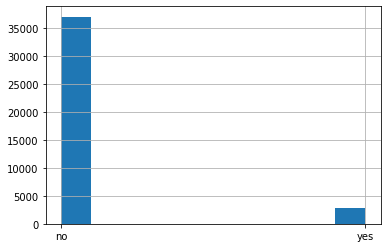

In [ ]:
df.y.hist()

In [ ]:
df["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [ ]:
NO = round((df['y']=='no').sum()/len(df.y),2)*100
YES = round((df['y']=='yes').sum()/(len(df.y)),2)*100
dif = NO - YES
print(NO)
print(YES)
print(dif) 

93.0
7.000000000000001
86.0


client subscribed to a term deposit represent 93 %

client not subscribed to a term deposit represent 7 %

the difference is 86%, the dataset is really unbalance

In [ ]:
# Create a function for distribution plot
def count_plot_(column_name, dataset):
    ax = sns.countplot(x=column_name, data= dataset)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,    
            height + 3,
            '{:1.2f}'.format(height/float(len(dataset))),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))

In [ ]:
# Distribution of client subscription to term deposit
#plt.figure(figsize=(8, 8))
#count_plot_('y', df)
#plt.show()

In [ ]:
#ax = sns.countplot(x=("PhdDecade", "first"),
#                 data=df_faculty, color="grey")
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+0.25, height+ 3, 'n=%.0f'%(height))

## Univariete , bivariete and multivariete analysis for categorical columns

In [ ]:
# check the percentage in each groupe for our report 
for col in cat_col:
    print(col)
    print(df[col].value_counts(normalize=True))
    print("...............................................")

job
blue-collar      0.234575
management       0.204150
technician       0.171300
admin            0.112075
services         0.097750
retired          0.035925
self-employed    0.035350
entrepreneur     0.035125
unemployed       0.027600
housemaid        0.027175
student          0.013100
unknown          0.005875
Name: job, dtype: float64
...............................................
marital
married     0.609650
single      0.272225
divorced    0.118125
Name: marital, dtype: float64
...............................................
education
secondary    0.524825
tertiary     0.280150
primary      0.156750
unknown      0.038275
Name: education, dtype: float64
...............................................
contact
cellular     0.622850
unknown      0.319125
telephone    0.058025
Name: contact, dtype: float64
...............................................


In [ ]:
df[cat_col].describe().T

,count,unique,top,freq
job,40000,12,blue-collar,9383
marital,40000,3,married,24386
education,40000,4,secondary,20993
contact,40000,3,cellular,24914


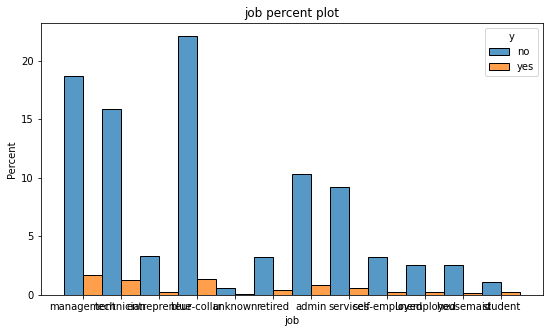

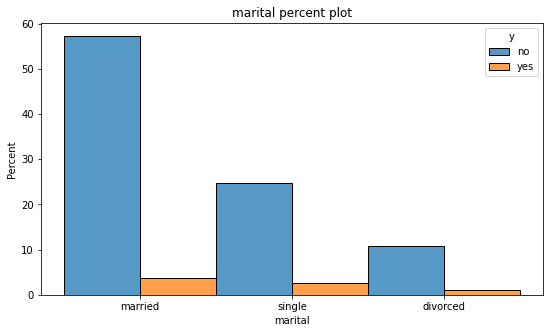

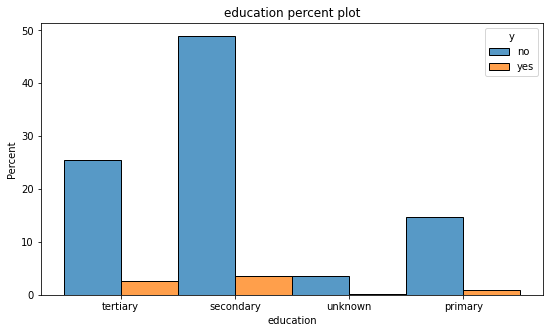

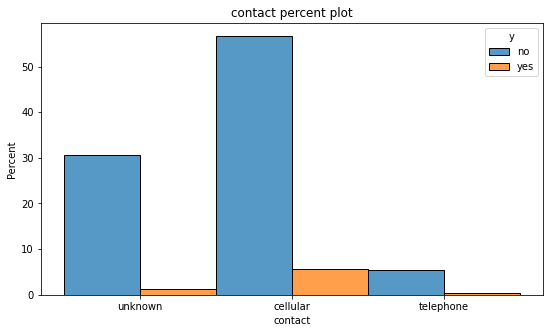

In [ ]:
for f in cat_col:
    plt.figure(figsize=(9, 5))
    sns.histplot(x=f,data=df, hue=df["y"], stat="percent", multiple="dodge")
    plt.title(f+' percent plot')
    plt.show()

In [ ]:
# 2. make a function to rum all the features 
def plot_frequency_features(df, col, Target):
    data = df.groupby([col,Target]).size()
    data = data.reset_index(name = 'count')
    data['frequency'] = round((data['count']/sum(data['count'])*100),2)
    data = data.pivot(index = Target, columns = col , values = 'frequency')
    sns.heatmap(data, annot = True,  cmap = 'rocket_r')
    plt.xlabel(col, size = 14)
    plt.ylabel(Target, size = 14)
    plt.title (col + " frenquency", size = 14)
    plt.show();

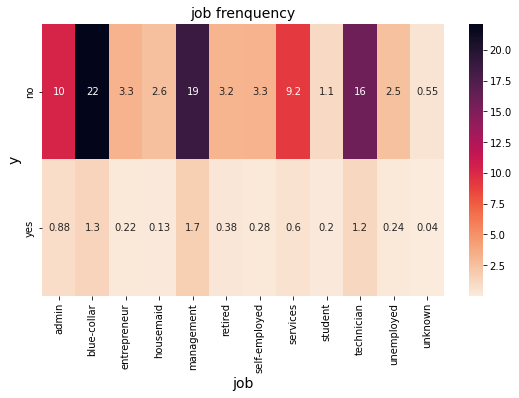

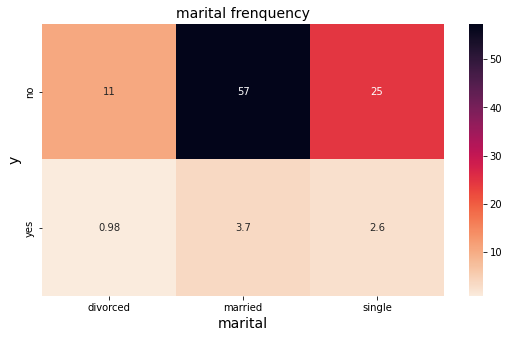

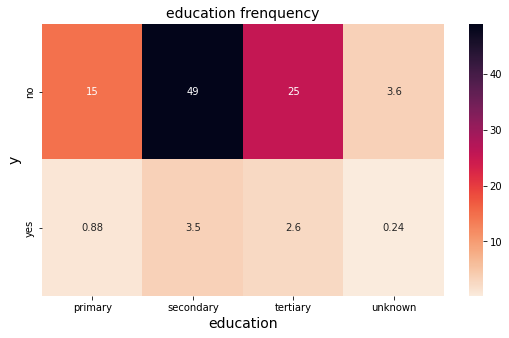

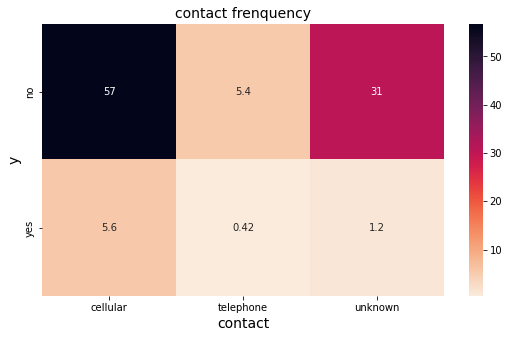

In [ ]:
target = 'y'
for col in cat_col:
  plt.figure(figsize=(9, 5))
  plot_frequency_features(df, col, target)


The most common job type of customer how subscribed to term deposit are Blue_collar (1.3%), management (1.7%), and technician (1.2%).

subscribers to term deposits tend to be married people (3,7 %)

subscribers to term deposits tend to have cellular (5.6%)

education statut of subscribers to term deposits are secondary(3.5%) and tertiary (2.6%)


In [ ]:
# check the percentage in each groupe for our report 
for col in bin_col:
    print(col)
    print(df[col].value_counts(normalize=True))
    print("...............................................")

default
no     0.979775
yes    0.020225
Name: default, dtype: float64
...............................................
housing
yes    0.600775
no     0.399225
Name: housing, dtype: float64
...............................................
loan
no     0.82675
yes    0.17325
Name: loan, dtype: float64
...............................................


In [ ]:
df[bin_col].describe().T

,count,unique,top,freq
default,40000,2,no,39191
housing,40000,2,yes,24031
loan,40000,2,no,33070


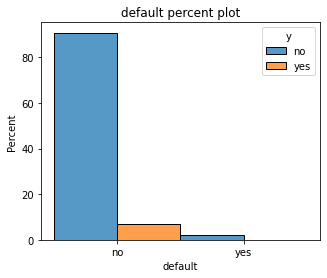

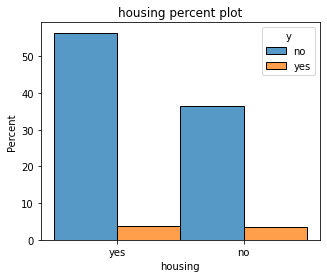

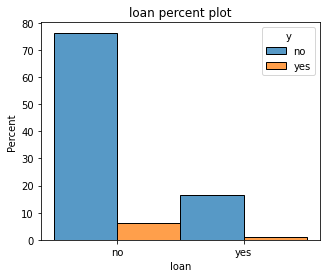

In [ ]:
for f in bin_col:
    plt.figure(figsize=(5, 4))
    sns.histplot(x=f,data=df, hue=df["y"], stat="percent", multiple="dodge")
    plt.title(f+' percent plot')
    plt.show()

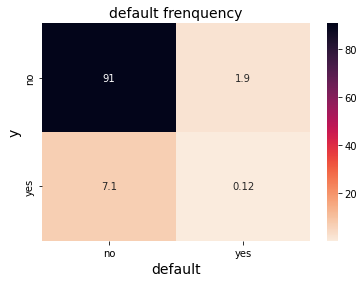

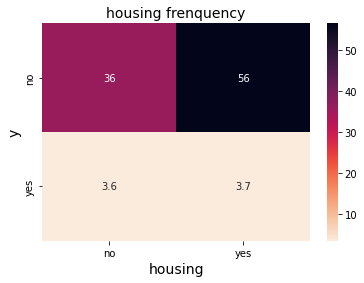

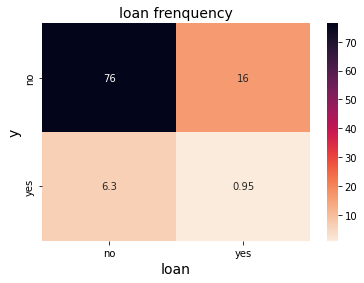

In [ ]:
target = 'y'
for col in bin_col:
  plot_frequency_features(df, col, target)

Subscribers to term deposits tend to have no loan and no default credit, housing is balance between the two groups

## Univariete , bivariete and multivariete analysis for numerical columns

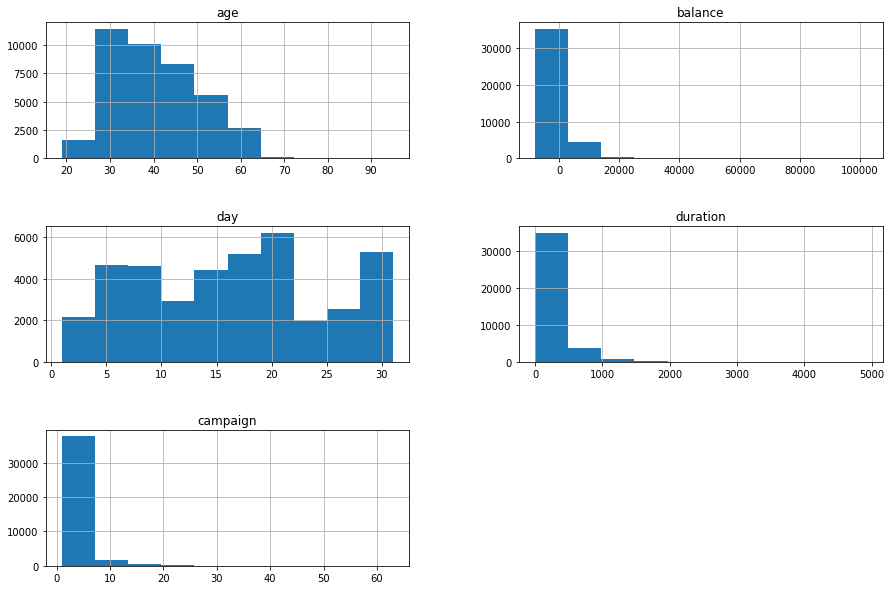

In [ ]:
#view the distribution of data 
df.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

In [ ]:
df[num_col].head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


In [ ]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


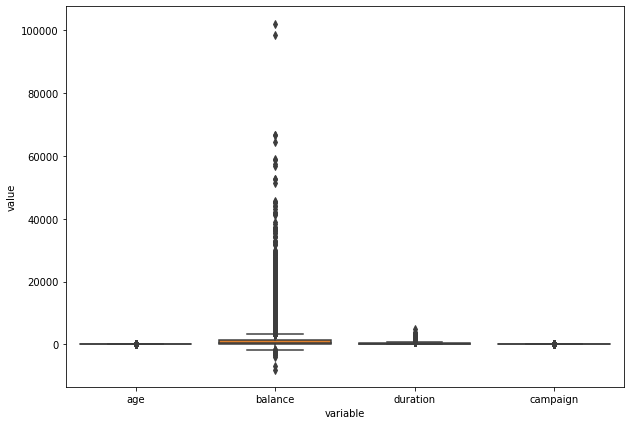

In [ ]:
# visualize outliers
# visualize outliers if any on numerical columns
#melt data frame into long format
plt.figure(figsize=(10, 7))
data_melted = pd.melt(df[num_col])
sns.boxplot(x='variable', y='value', data=data_melted)

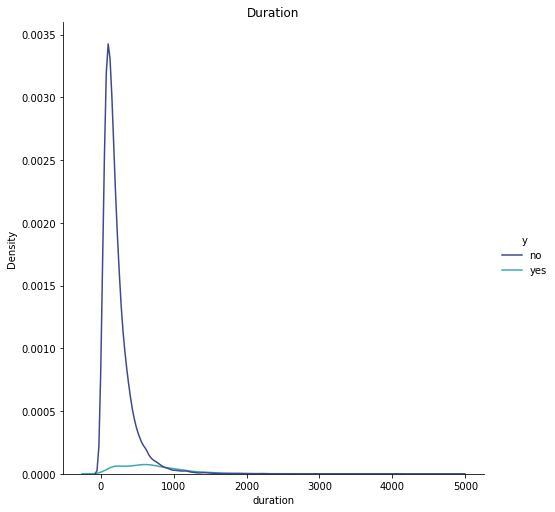

In [ ]:
# plot age and target features
sns.displot(data = df, x = "duration" , palette='mako',  kind="kde", hue = "y", height = 7)
plt.title('Duration')
plt.show()

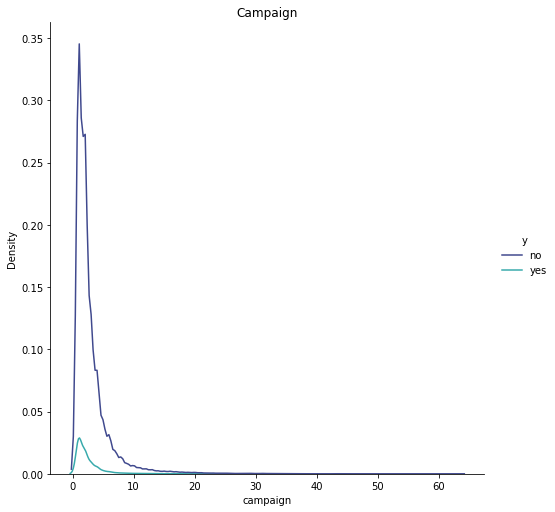

In [ ]:
# plot age and target features
sns.displot(data = df, x = "campaign" , palette='mako',  kind="kde", hue = "y", height = 7)
plt.title('Campaign')
plt.show()

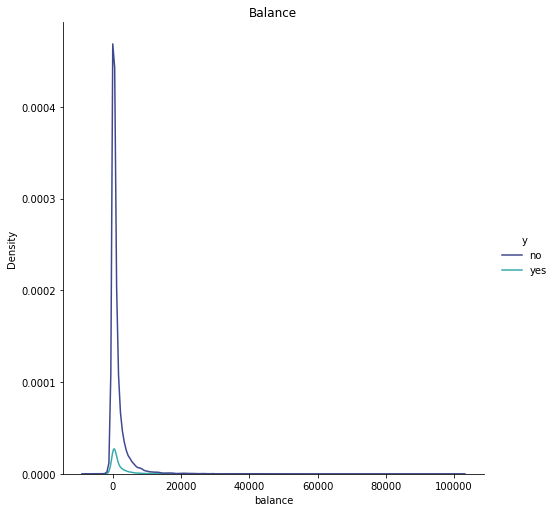

In [ ]:
# plot age and target features
sns.displot(data = df, x = "balance" , palette='mako',  kind="kde", hue = "y", height = 7)
plt.title('Balance')
plt.show()

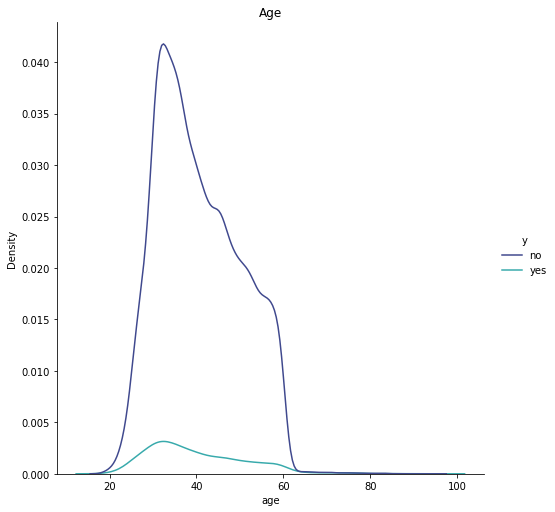

In [ ]:
# plot age and target features
sns.displot(data = df, x = "age" , palette='mako',  kind="kde", hue = "y", height = 7)
plt.title('Age')
plt.show()

In [ ]:
def visualizethreecol(target, Num_col, Cat_col):
    sns.barplot(data = df, x = target, y = Num_col , hue = Cat_col, palette='mako')
    plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

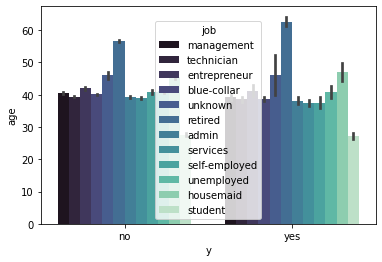

In [ ]:
visualizethreecol('y', 'age', 'job')

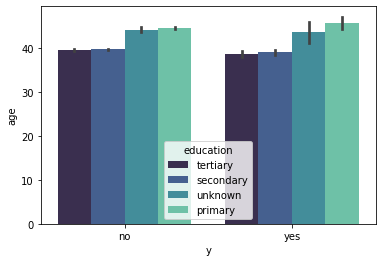

In [ ]:
visualizethreecol('y', 'age', 'education')

Age and education look almost the same between customers groups (subscribers or not)

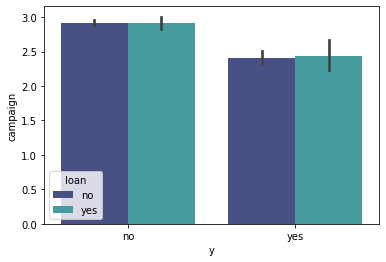

In [ ]:
visualizethreecol('y', 'campaign', 'loan')

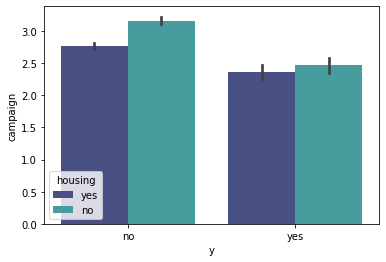

In [ ]:
visualizethreecol('y', 'campaign', 'housing')

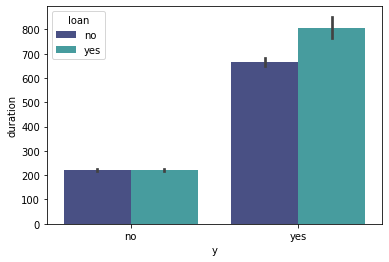

In [ ]:
visualizethreecol('y', 'duration', 'loan')

duration and loan have an impact to customer types 
subscribers tend to have loan and have experienced long duration call

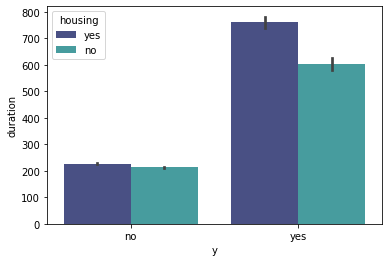

In [ ]:
visualizethreecol('y', 'duration', 'housing')

duration and housing have an impact to customer types 
subscribers tend to have housing and have experienced long duration call

age
Skew : 0.44


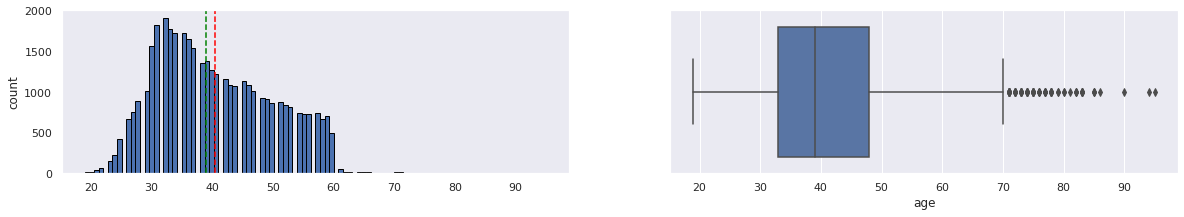

balance
Skew : 8.26


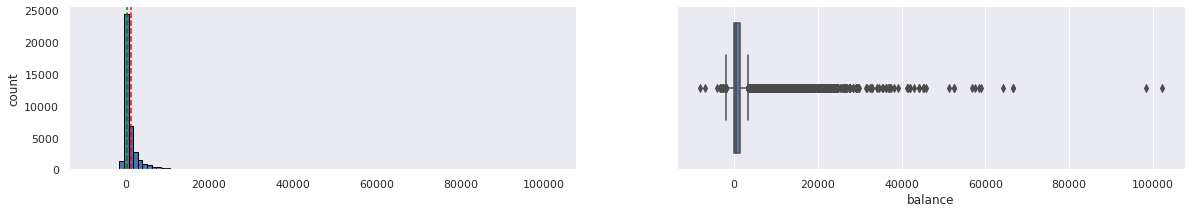

duration
Skew : 3.17


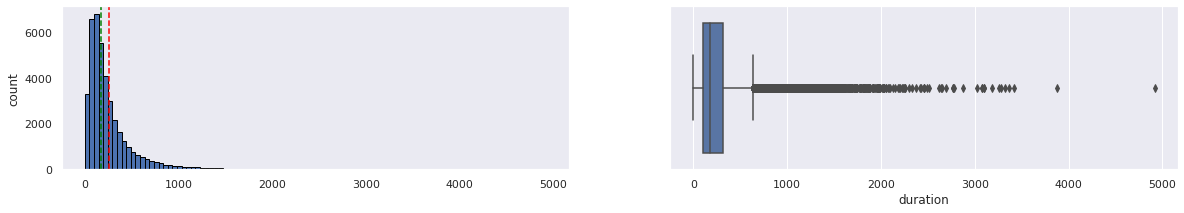

campaign
Skew : 4.73


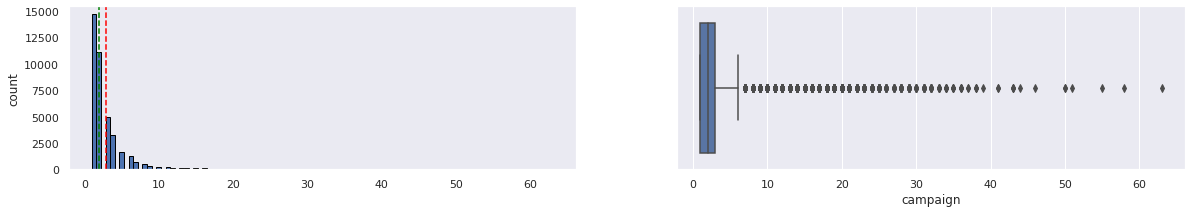

In [ ]:
# Plotting a histogram and boxplot to check the distribution of our numerical data
sns.set(font_scale = 1)
Cols = num_col
for col in Cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=100, grid=False, ec='black')
    plt.axvline(x = df[col].mean(), linestyle ="--", color ='red')
    plt.axvline(x = df[col].median(), linestyle ="--", color ='green')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
num_col

['age', 'balance', 'duration', 'campaign']

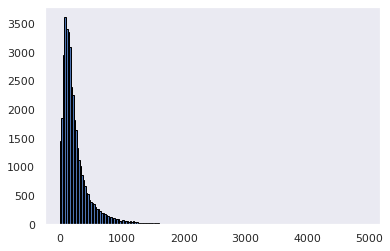

In [ ]:
df['duration'].hist(bins=200, grid=False, ec='black')

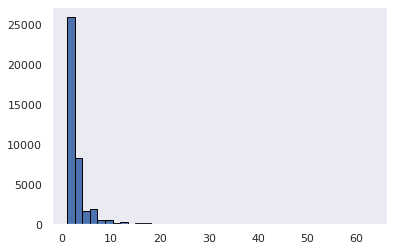

In [ ]:
df['campaign'].hist(bins=40, grid=False, ec='black')

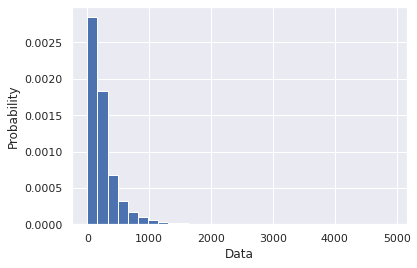

In [ ]:
%matplotlib inline
plt.hist(df['duration'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

## Correlation Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

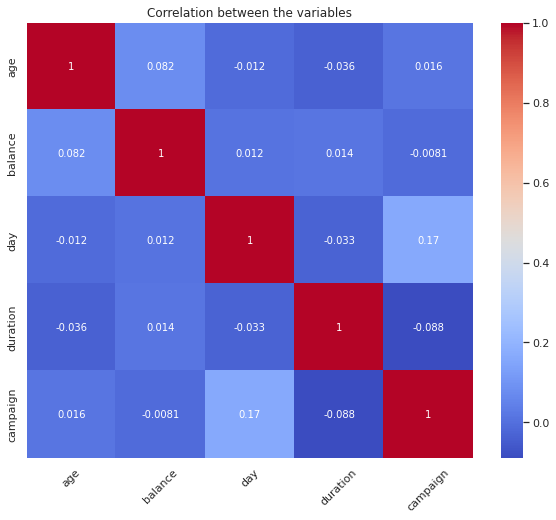

In [ ]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


# Data PreProcessing 

In [ ]:
df2 = df.copy()

In [ ]:
# binary feature

In [ ]:
bin_col

['default', 'housing', 'loan']

In [ ]:
# transform two valued categorical features with ordinal encoding
df2['housing'] = df2['housing'].map({'yes': 1, 'no': 0})
df2['default'] = df2['default'].map({'yes': 1, 'no': 0})
df2['loan'] = df2['loan'].map({'yes': 1, 'no': 0})
df2['y']= df2['y'].map({'yes': 1, 'no': 0})
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [ ]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [ ]:
df2.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [ ]:
# label encode cat_variable 
# one hot encoding is preferd over label encoding 
# one hot encoding is advise for non ordinal features and the number ofa

In [ ]:
cat_col.append('month')
cat_col

['job', 'marital', 'education', 'contact', 'month']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df2[cat_col] = df2[cat_col].apply(lambda col: le.fit_transform(col))   

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

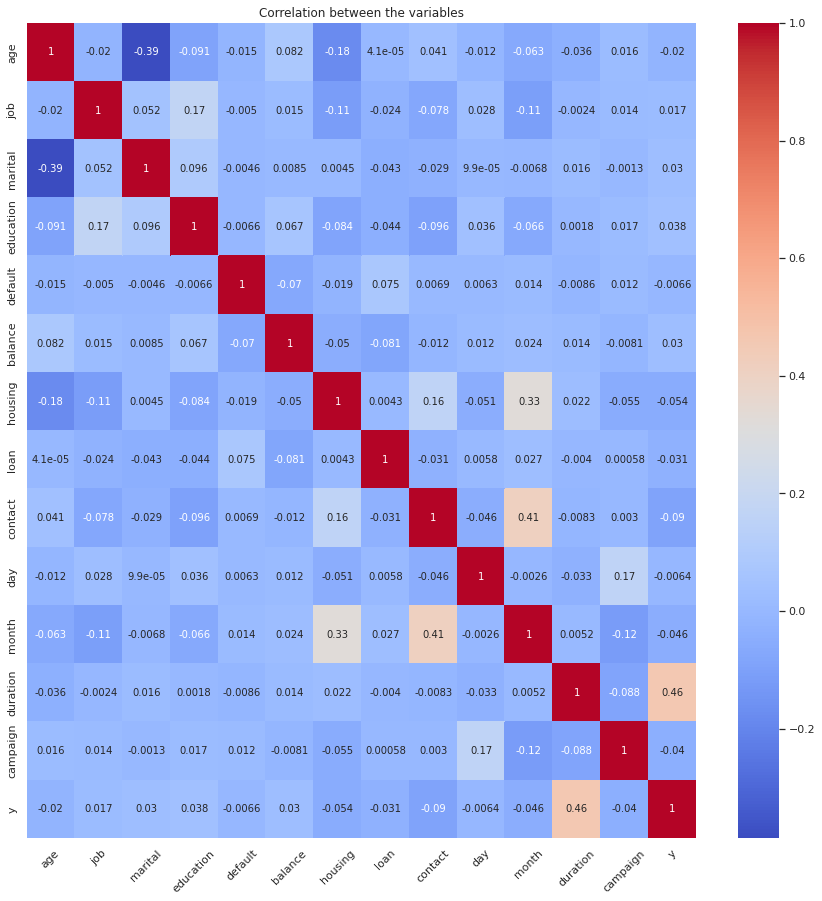

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [ ]:
# get target and features
y = df2['y']
X = df2.drop(columns = ['y'])

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
#array_hot_encoded = ohe.fit_transform(df2[cat_col])

#Convert it to df
#data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df2.index)

#Extract only the columns that didnt need to be encoded
#data_other_cols = df2.drop(columns=cat_col)

#Concatenate the two dataframes : 
#data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

# Modeling part I

## Base line model with no feature ingeneering, no Smote

In [ ]:
# Keep track of model metric
# initialize an empty dictionary
F1_score = {}
Precision_score = {}
Recall_score = {}
AUC = {}
cv_Accuracy  = {}
accuracy_dic = {}

In [ ]:
# define function to build the base line model
def modeling(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    target_names = ['no', 'yes']
    report = classification_report(y_test, y_pred, target_names=target_names)
    #report = classification_report(y_test, y_pred)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    #Keep track of model metric
    accuracy = accuracy_score(y_test,y_pred) #predictions
    accuracy_dic[model_name] = float(round(accuracy, 2))
    cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
    F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
    Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
    Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
    AUC[model_name] = roc_auc_score(y_test, y_pred_prob)
    return  print(report)

In [ ]:
# define a function to plot the ROC curve (receiver operating characteristic curve)
# and compute the area under the curve
def plot_roc_curve(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    # Compute and print AUC score
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Adjusting the weight
weight={0: 0.07, 1: 0.93}
# intialize all base line model
dt = DecisionTreeClassifier(class_weight=weight)
lr = LogisticRegression(class_weight=weight)
KNN = KNeighborsClassifier(n_neighbors= 4)
rf= RandomForestClassifier(class_weight=weight)
GBC = GradientBoostingClassifier()
XGB = XGBClassifier(class_weight=weight)
models = [dt, lr, KNN, rf, GBC, XGB]
models

[DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}),
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}),
 KNeighborsClassifier(n_neighbors=4),
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}),
 GradientBoostingClassifier(),
 XGBClassifier(class_weight={0: 0.07, 1: 0.93})]

In [ ]:
model_names = ['DecisionTree_0', 'LogisticReg_0','KNeighborsCl_0','RandomForestCl_0',
               'GradientBoostingCl_0', 'XGBClassifier_0']

model_dic = dict(zip(models, model_names))
model_dic

{DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}): 'DecisionTree_0',
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}): 'LogisticReg_0',
 KNeighborsClassifier(n_neighbors=4): 'KNeighborsCl_0',
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}): 'RandomForestCl_0',
 GradientBoostingClassifier(): 'GradientBoostingCl_0',
 XGBClassifier(class_weight={0: 0.07, 1: 0.93}): 'XGBClassifier_0'}

In [ ]:
for model, name in model_dic.items():
  print(name)
  modeling(model, name)

DecisionTree_0
              precision    recall  f1-score   support

          no       0.95      0.96      0.95      9250
         yes       0.43      0.39      0.41       750

    accuracy                           0.92     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.91      0.92      0.91     10000

LogisticReg_0
              precision    recall  f1-score   support

          no       0.98      0.84      0.91      9250
         yes       0.29      0.78      0.42       750

    accuracy                           0.84     10000
   macro avg       0.63      0.81      0.66     10000
weighted avg       0.93      0.84      0.87     10000

KNeighborsCl_0
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      9250
         yes       0.52      0.16      0.24       750

    accuracy                           0.93     10000
   macro avg       0.73      0.57      0.60     10000
weighted avg       0.90      0

DecisionTree_0


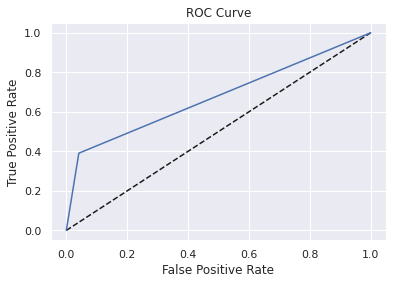

AUC: 0.6747387387387387
LogisticReg_0


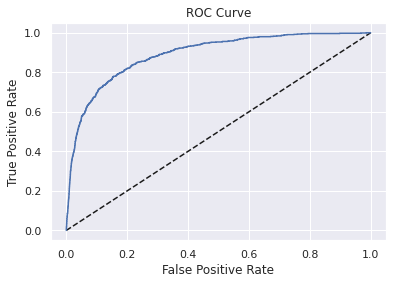

AUC: 0.8902856936936938
KNeighborsCl_0


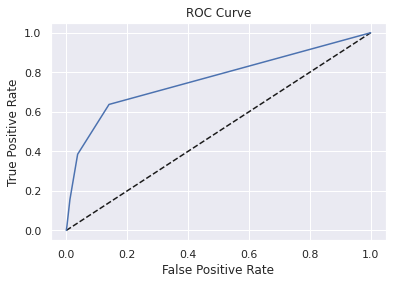

AUC: 0.7642063423423423
RandomForestCl_0


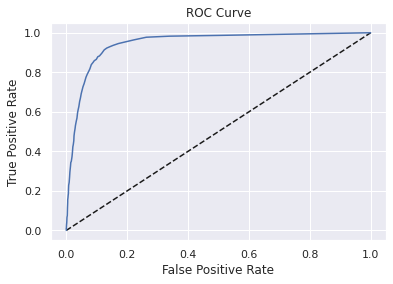

AUC: 0.945086846846847
GradientBoostingCl_0


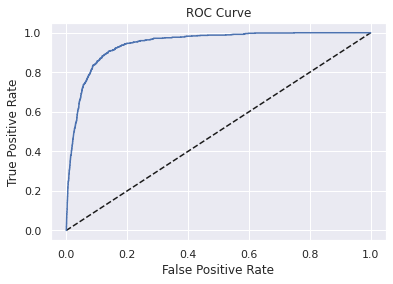

AUC: 0.9439112072072071
XGBClassifier_0


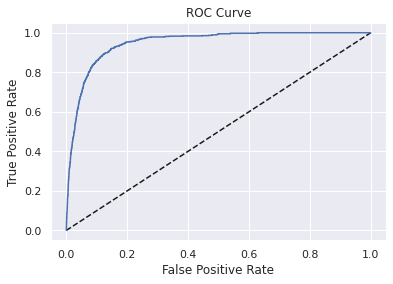

AUC: 0.9471876036036035


In [ ]:
for model, name in model_dic.items():
  print(name)
  plot_roc_curve(model)

In [ ]:
accuracy_dic

{'DecisionTree_0': 0.92,
 'LogisticReg_0': 0.84,
 'KNeighborsCl_0': 0.93,
 'RandomForestCl_0': 0.93,
 'GradientBoostingCl_0': 0.94,
 'XGBClassifier_0': 0.94}

In [ ]:
Accuracy = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
Accuracy.sort_values(by= 'Accuracy', inplace=True)
Accuracy

,Model,Accuracy
1,LogisticReg_0,0.84
0,DecisionTree_0,0.92
2,KNeighborsCl_0,0.93
3,RandomForestCl_0,0.93
4,GradientBoostingCl_0,0.94
5,XGBClassifier_0,0.94


In [ ]:
cv_Accuracy

{'DecisionTree_0': 0.9159333333333333,
 'LogisticReg_0': 0.8312666666666667,
 'KNeighborsCl_0': 0.9267666666666667,
 'RandomForestCl_0': 0.9324333333333333,
 'GradientBoostingCl_0': 0.9361,
 'XGBClassifier_0': 0.9354333333333333}

In [ ]:
Accuracy_cv = pd.DataFrame(list(cv_Accuracy.items()), columns=['Model', 'Accuracy'])
Accuracy_cv.sort_values(by= 'Accuracy', inplace=True)
Accuracy_cv

,Model,Accuracy
1,LogisticReg_0,0.831267
0,DecisionTree_0,0.915933
2,KNeighborsCl_0,0.926767
3,RandomForestCl_0,0.932433
5,XGBClassifier_0,0.935433
4,GradientBoostingCl_0,0.936100


In [ ]:
F1 = pd.DataFrame(list(F1_score.items()), columns=['Model', 'F1_score'])
F1.sort_values(by= 'F1_score', inplace=True)
F1

,Model,F1_score
1,LogisticReg_0,0.870761
2,KNeighborsCl_0,0.906835
0,DecisionTree_0,0.914135
3,RandomForestCl_0,0.919149
5,XGBClassifier_0,0.927816
4,GradientBoostingCl_0,0.928742


In [ ]:
Precision = pd.DataFrame(list(Precision_score .items()), columns=['Model', 'Precision_score'])
Precision.sort_values(by= 'Precision_score', inplace=True)
Precision

,Model,Precision_score
2,KNeighborsCl_0,0.903744
0,DecisionTree_0,0.912276
3,RandomForestCl_0,0.922886
1,LogisticReg_0,0.927468
4,GradientBoostingCl_0,0.928669
5,XGBClassifier_0,0.929146


In [ ]:
Recall= pd.DataFrame(list(Recall_score.items()), columns=['Model', 'Recall_score'])
Recall.sort_values(by= 'Recall_score', inplace=True)
Recall

,Model,Recall_score
1,LogisticReg_0,0.8400
0,DecisionTree_0,0.9162
2,KNeighborsCl_0,0.9257
3,RandomForestCl_0,0.9349
4,GradientBoostingCl_0,0.9387
5,XGBClassifier_0,0.9390


In [ ]:
auc= pd.DataFrame(list(AUC.items()), columns=['Model', 'AUC'])
auc.sort_values(by= 'AUC', inplace=True)
auc

,Model,AUC
0,DecisionTree_0,0.674739
2,KNeighborsCl_0,0.764206
1,LogisticReg_0,0.890286
4,GradientBoostingCl_0,0.943911
3,RandomForestCl_0,0.945087
5,XGBClassifier_0,0.947188


## Imbalanced Classification in Python: SMOTE

SMOTE is an intelligent alternative to oversampling: rather than creating duplicates of the minority class, it creates synthetic data points that are relatively similar to the original ones.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df2['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [ ]:
# Oversample
sm = SMOTE(random_state=47)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({0: 37104, 1: 37104})


In [ ]:
X_res.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1


In [ ]:
X_res.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
dtype: object

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

In [ ]:
# intialize all base line model
dt2 = DecisionTreeClassifier()
lr2 = LogisticRegression()
KNN2 = KNeighborsClassifier()
rf2= RandomForestClassifier()
GBC2 = GradientBoostingClassifier()
XGB2 = XGBClassifier()
models2 = [dt2, lr2, KNN2, rf2 , GBC2, XGB2]
models2

[DecisionTreeClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier()]

In [ ]:
model_names2 = ['DecisionTree_smot', 'LogisticReg_smot','KNeighborsCl_smot','RandomForestCl_smot',
               'GradientBoostingCl_smot', 'XGBClassifier_smot']

model_dic2 = dict(zip(models2, model_names2))
model_dic2

{DecisionTreeClassifier(): 'DecisionTree_smot',
 LogisticRegression(): 'LogisticReg_smot',
 KNeighborsClassifier(): 'KNeighborsCl_smot',
 RandomForestClassifier(): 'RandomForestCl_smot',
 GradientBoostingClassifier(): 'GradientBoostingCl_smot',
 XGBClassifier(): 'XGBClassifier_smot'}

In [ ]:
for model, name in model_dic2.items():
  print(name)
  modeling(model, name)

DecisionTree_smot
              precision    recall  f1-score   support

          no       0.93      0.91      0.92      9296
         yes       0.91      0.94      0.92      9256

    accuracy                           0.92     18552
   macro avg       0.92      0.92      0.92     18552
weighted avg       0.92      0.92      0.92     18552

LogisticReg_smot
              precision    recall  f1-score   support

          no       0.82      0.86      0.84      9296
         yes       0.85      0.81      0.83      9256

    accuracy                           0.83     18552
   macro avg       0.83      0.83      0.83     18552
weighted avg       0.83      0.83      0.83     18552

KNeighborsCl_smot
              precision    recall  f1-score   support

          no       0.96      0.81      0.88      9296
         yes       0.84      0.97      0.90      9256

    accuracy                           0.89     18552
   macro avg       0.90      0.89      0.89     18552
weighted avg       0.

DecisionTree_smot


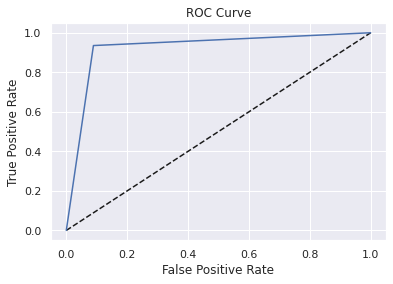

AUC: 0.9229995206161106
LogisticReg_smot


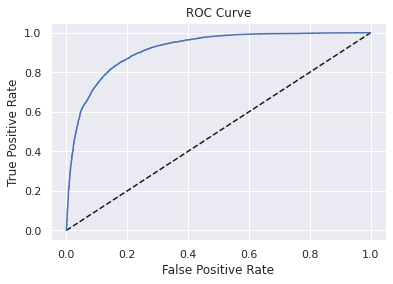

AUC: 0.9160602272963939
KNeighborsCl_smot


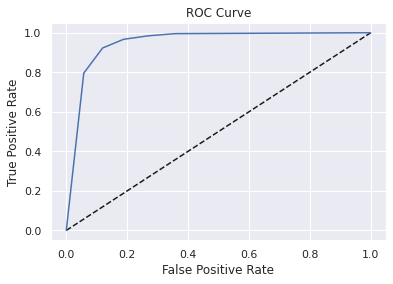

AUC: 0.9485788431693187
RandomForestCl_smot


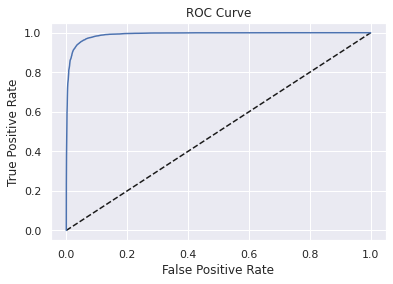

AUC: 0.9907721855442514
GradientBoostingCl_smot


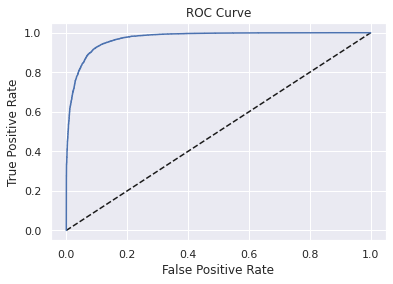

AUC: 0.971907590387479
XGBClassifier_smot


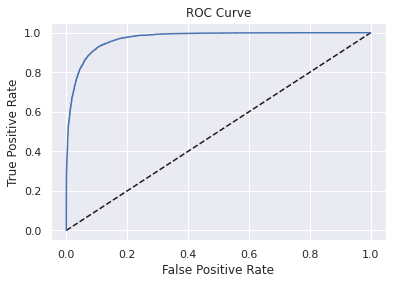

AUC: 0.9711870036944916


In [ ]:
for model, name in model_dic2.items():
  print(name)
  plot_roc_curve(model)

In [ ]:
Accuracy = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
Accuracy.sort_values(by= 'Accuracy', inplace=True)
Accuracy

,Model,Accuracy
7,LogisticReg_smot,0.83
1,LogisticReg_0,0.84
8,KNeighborsCl_smot,0.89
10,GradientBoostingCl_smot,0.91
11,XGBClassifier_smot,0.91
0,DecisionTree_0,0.92
6,DecisionTree_smot,0.92
2,KNeighborsCl_0,0.93
3,RandomForestCl_0,0.93
4,GradientBoostingCl_0,0.94


In [ ]:
Accuracy_cv = pd.DataFrame(list(cv_Accuracy.items()), columns=['Model', 'Accuracy'])
Accuracy_cv.sort_values(by= 'Accuracy', inplace=True)
Accuracy_cv

,Model,Accuracy
1,LogisticReg_0,0.831267
7,LogisticReg_smot,0.836280
8,KNeighborsCl_smot,0.883625
11,XGBClassifier_smot,0.913738
10,GradientBoostingCl_smot,0.914672
0,DecisionTree_0,0.915933
6,DecisionTree_smot,0.919577
2,KNeighborsCl_0,0.926767
3,RandomForestCl_0,0.932433
5,XGBClassifier_0,0.935433


In [ ]:
F1 = pd.DataFrame(list(F1_score.items()), columns=['Model', 'F1_score'])
F1.sort_values(by= 'F1_score', inplace=True)
F1

,Model,F1_score
7,LogisticReg_smot,0.833088
1,LogisticReg_0,0.870761
8,KNeighborsCl_smot,0.888522
2,KNeighborsCl_0,0.906835
11,XGBClassifier_smot,0.910964
10,GradientBoostingCl_smot,0.913518
0,DecisionTree_0,0.914135
3,RandomForestCl_0,0.919149
6,DecisionTree_smot,0.922964
5,XGBClassifier_0,0.927816


In [ ]:
Precision = pd.DataFrame(list(Precision_score .items()), columns=['Model', 'Precision_score'])
Precision.sort_values(by= 'Precision_score', inplace=True)
Precision

,Model,Precision_score
7,LogisticReg_smot,0.834224
8,KNeighborsCl_smot,0.898846
2,KNeighborsCl_0,0.903744
11,XGBClassifier_smot,0.911897
0,DecisionTree_0,0.912276
10,GradientBoostingCl_smot,0.914033
3,RandomForestCl_0,0.922886
6,DecisionTree_smot,0.923235
1,LogisticReg_0,0.927468
4,GradientBoostingCl_0,0.928669


In [ ]:
Recall= pd.DataFrame(list(Recall_score.items()), columns=['Model', 'Recall_score'])
Recall.sort_values(by= 'Recall_score', inplace=True)
Recall

,Model,Recall_score
7,LogisticReg_smot,0.833226
1,LogisticReg_0,0.840000
8,KNeighborsCl_smot,0.889176
11,XGBClassifier_smot,0.911007
10,GradientBoostingCl_smot,0.913540
0,DecisionTree_0,0.916200
6,DecisionTree_smot,0.922973
2,KNeighborsCl_0,0.925700
3,RandomForestCl_0,0.934900
4,GradientBoostingCl_0,0.938700


In [ ]:
auc= pd.DataFrame(list(AUC.items()), columns=['Model', 'AUC'])
auc.sort_values(by= 'AUC', inplace=True)
auc

,Model,AUC
0,DecisionTree_0,0.674739
2,KNeighborsCl_0,0.764206
1,LogisticReg_0,0.890286
7,LogisticReg_smot,0.916060
6,DecisionTree_smot,0.923000
4,GradientBoostingCl_0,0.943911
3,RandomForestCl_0,0.945087
5,XGBClassifier_0,0.947188
8,KNeighborsCl_smot,0.948579
11,XGBClassifier_smot,0.971187


## Get Features of importance a and Shap Value  

In [ ]:
def plot_feature_importance(model, title): 
  plt.figure(figsize=(6, 5))
  feat_importance = model.feature_importances_
  feature_names = [f"feature {i}" for i in X_train.columns]
  forest_importances = pd.Series(feat_importance, index=feature_names).sort_values(ascending=False)
  forest_importances.plot.barh()
  plt.title(title)

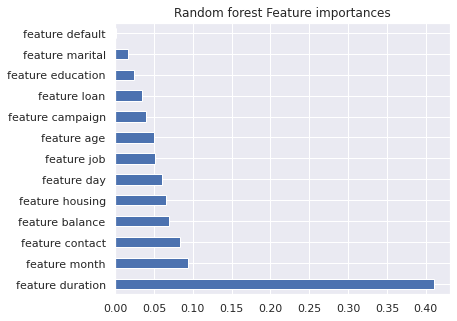

In [ ]:
plot_feature_importance(rf2, 'Random forest Feature importances')

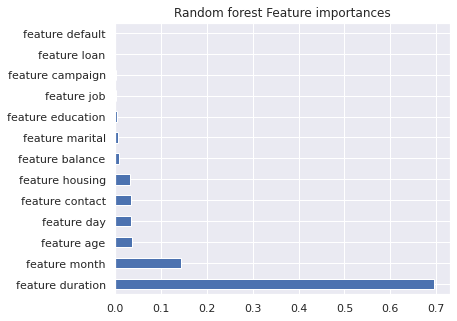

In [ ]:
plot_feature_importance(GBC, 'Random forest Feature importances')

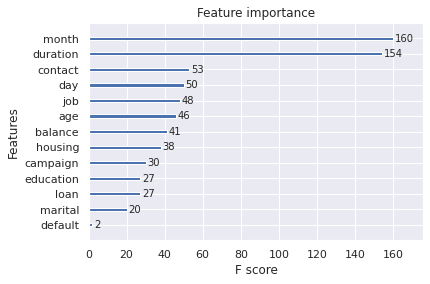

In [ ]:
plot_importance(XGB.fit(X_train, y_train))

duration is the number one feature in all models
month is the number two feature in all models
other important features are age, day, contact, housing and balance. 


In [ ]:
#!pip install shap

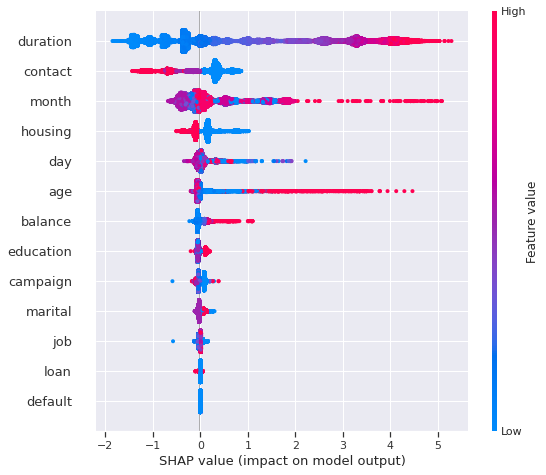

In [ ]:
import shap
# shap value of Gradien Boost classifiier
explainer = shap.TreeExplainer(GBC)
shap_values = explainer.shap_values(X_train)
## summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

Form shap value plot, it is almost the same main features that has great impact on model prediction.

We noticd that default, loan , job and marital status has less impact in model prediction. 

In [ ]:
#feature_names=list(X_train.columns.values)
#feature_names

we got the features of importance and shap value of features of the best 3 models.
we found that:


# Features ingeneering

## duration

In [ ]:
 df['duration'].describe()

count    40000.000000
mean       254.824300
std        259.366498
min          0.000000
25%        100.000000
50%        175.000000
75%        313.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
#define bins 
#bins = list(np.linspace(0, 4918, 7 , dtype = 'int'))
#name of groups
#groups = ['low1', 'low2', 'medium1', 'medium2', 'high1', 'high2']

bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
duration_range = ['<.5k', '.5-1k', '1-1.5k', '1.5-2k', '2-2.5k', '2.5-3k', '3-3.5k', '3.5-4k', '4-4.5k', '4.5-5k']

df['duration_cut'] = pd.cut(df['duration'], bins=bins, labels=duration_range,  ordered=True)

df[['duration', 'duration_cut']].head()

,duration,duration_cut
0,261,<.5k
1,151,<.5k
2,76,<.5k
3,92,<.5k
4,198,<.5k


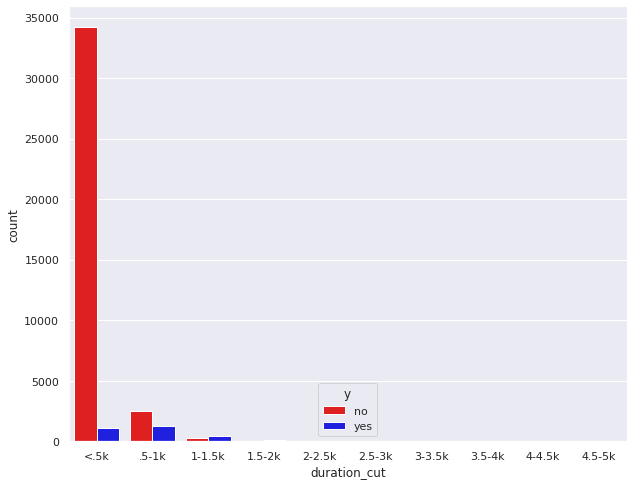

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot( data = df, x='duration_cut', palette=['red','blue'], hue=df['y'])

## Campain 

In [ ]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
#define bins 
bins = [0, 20, 40, 65]

#name of groups
groups = ['low', 'medium', 'high' ]

df['campaign_cut'] = pd.cut(df['campaign'], bins=bins, labels=groups,  ordered=True)

df[['campaign', 'campaign_cut']].head()

,campaign,campaign_cut
0,1,low
1,1,low
2,1,low
3,1,low
4,1,low


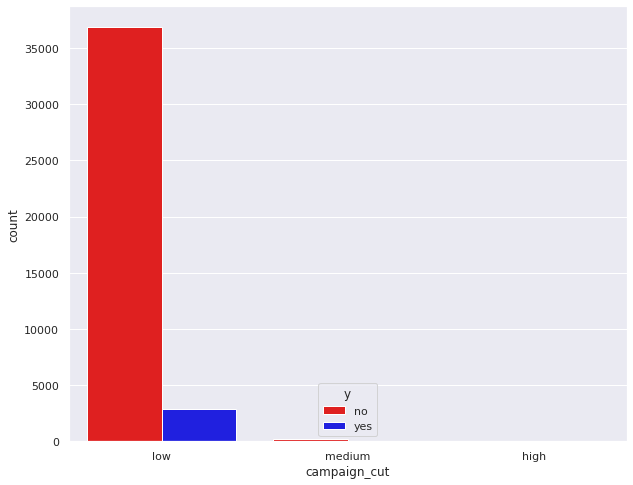

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot( data = df, x='campaign_cut', palette=['red','blue'], hue=df['y'])

## balance

In [ ]:
df['balance'].describe()

count     40000.000000
mean       1274.277550
std        2903.769716
min       -8019.000000
25%          54.000000
50%         407.000000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
# Let's create a column that combines balances 
bins = [-8020, 0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 110000]
balance_range = ['<10k', '10-20k', '20-30k', '30-40k', '40-50k', '50-60k', '60-70k', '70-80k', '80-90k', '90-100k', '100+']

df['balance_cut'] = pd.cut(df['balance'], bins=bins, labels=balance_range,  ordered=True)

df[['balance', 'balance_cut']].head()


,balance,balance_cut
0,2143,10-20k
1,29,10-20k
2,2,10-20k
3,1506,10-20k
4,1,10-20k


In [ ]:
df[['balance', 'balance_cut']].isna().sum()

balance        0
balance_cut    0
dtype: int64

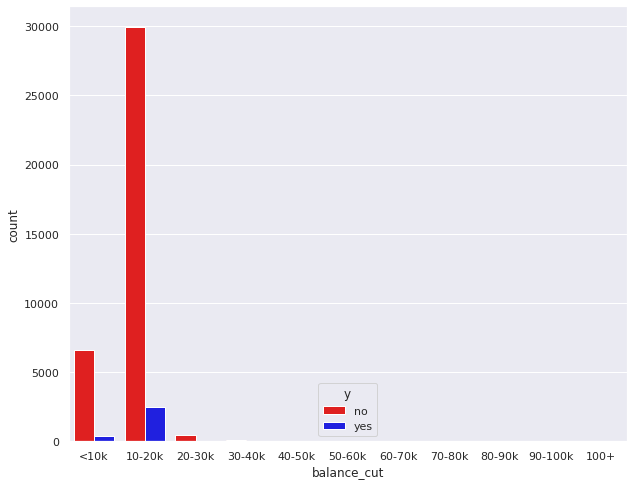

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot( data = df, x='balance_cut', palette=['red','blue'], hue=df['y'])

## Age

In [ ]:
df['age'].describe()

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_range = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']

df['age_cut'] = pd.cut(df['age'], bins=bins, labels=age_range,  ordered=True)

df[['age', 'age_cut']].head()

,age,age_cut
0,58,50-60
1,44,40-50
2,33,30-40
3,47,40-50
4,33,30-40


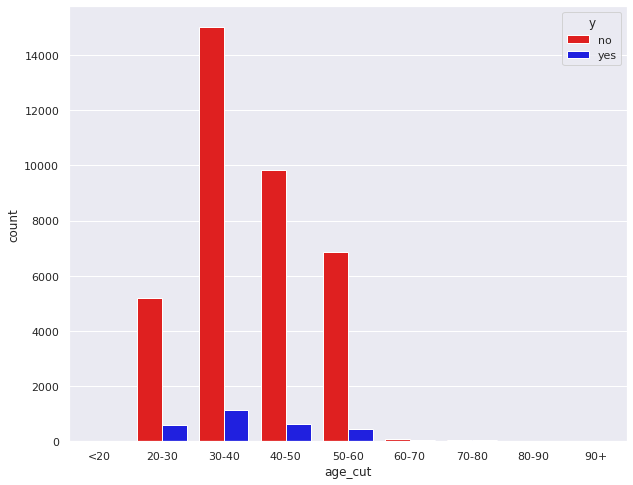

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot( data = df, x='age_cut', palette=['red','blue'], hue=df['y'])

In [ ]:
# Counting the Total Number of Applicants per age group
df[df['y'] == 'yes'].groupby(['age_cut','y']).size().reset_index(name='count')

,age_cut,y,count
0,<20,yes,6
1,20-30,yes,593
2,30-40,yes,1129
3,40-50,yes,634
4,50-60,yes,443
5,60-70,yes,54
6,70-80,yes,30
7,80-90,yes,6
8,90+,yes,1


## Education 

In [ ]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['education'] = np.where(df['education']== 'primary', 'primary_unknown', df['education'])
df['education'] = np.where(df['education']== 'unknown', 'primary_unknown', df['education'])

## EDA part II

In [ ]:
new_cols = ['age_cut', 'balance_cut', 'duration_cut', 'campaign_cut', 'education']

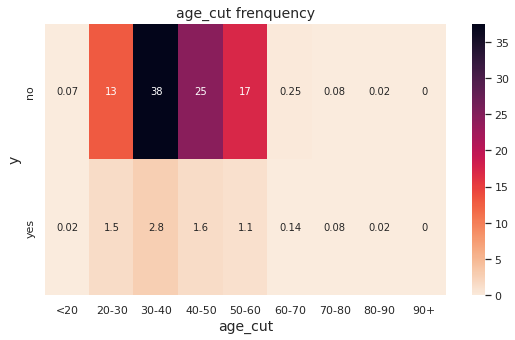

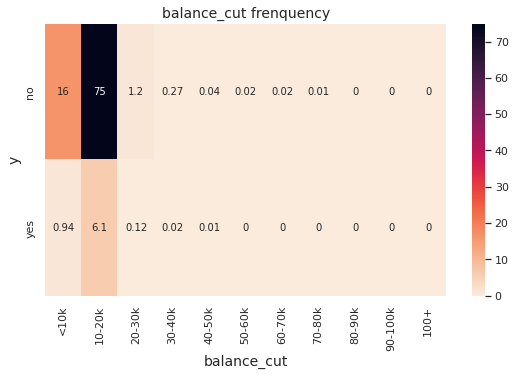

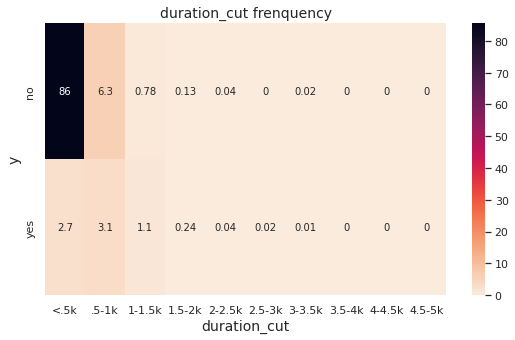

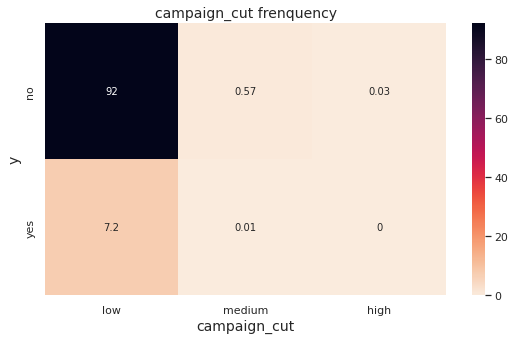

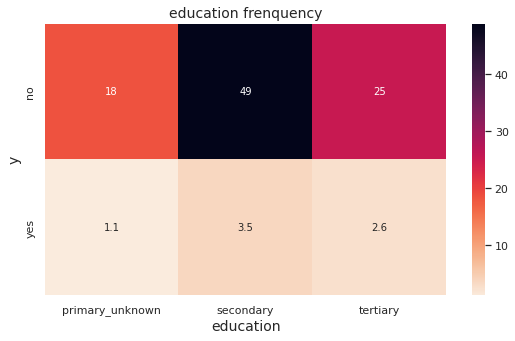

In [ ]:
target = 'y'
for col in new_cols:
  plt.figure(figsize=(9, 5))
  plot_frequency_features(df, col, target)

# Modeling Part II

In [ ]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
y               0
duration_cut    0
campaign_cut    0
balance_cut     0
age_cut         0
dtype: int64

In [ ]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,duration_cut,campaign_cut,balance_cut,age_cut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,<.5k,low,10-20k,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,<.5k,low,10-20k,40-50


## Data preprocessing 

In [ ]:
df3 = df.copy()

In [ ]:
# transform two valued categorical features with ordinal encoding
df3['housing'] = df3['housing'].map({'yes': 1, 'no': 0})
df3['default'] = df3['default'].map({'yes': 1, 'no': 0})
df3['loan'] = df3['loan'].map({'yes': 1, 'no': 0})
df3['y']= df3['y'].map({'yes': 1, 'no': 0})
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,duration_cut,campaign_cut,balance_cut,age_cut
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,<.5k,low,10-20k,50-60
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,<.5k,low,10-20k,40-50
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,<.5k,low,10-20k,30-40
3,47,blue-collar,married,primary_unknown,0,1506,1,0,unknown,5,may,92,1,0,<.5k,low,10-20k,40-50
4,33,unknown,single,primary_unknown,0,1,0,0,unknown,5,may,198,1,0,<.5k,low,10-20k,30-40


In [ ]:
cat_col

['job', 'marital', 'education', 'contact', 'month']

In [ ]:
# label encode categorical columns
le = LabelEncoder()
df3[cat_col] = df3[cat_col].apply(lambda col: le.fit_transform(col))

In [ ]:
new_col = ['age_cut', 'balance_cut', 'duration_cut', 'campaign_cut']
# label encode categorical columns
le = LabelEncoder()
df3[new_col] = df3[new_col].apply(lambda col: le.fit_transform(col))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

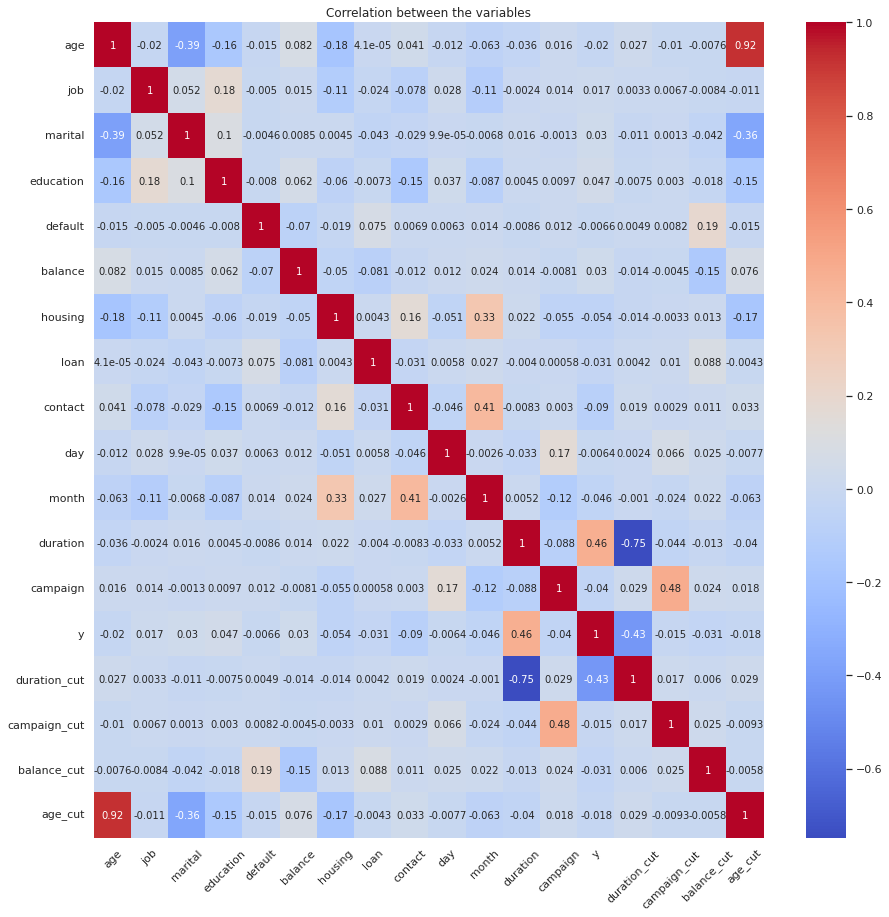

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(), annot=True,cmap="coolwarm")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

## Modeling

### Drop columns model 3 (unbalance dataset)

In [ ]:
df4 = df3.copy()

In [ ]:
df4.drop(columns = ['age', 'duration', 'campaign', 'balance', 'default', 'loan', 'job', 'marital'], inplace = True)

In [ ]:
# get target and features
y = df4['y']
X = df4.drop(columns = ['y'])

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [ ]:
from sklearn.utils import class_weight
# intialize all base line model
dt3 = DecisionTreeClassifier(class_weight=weight)
lr3 = LogisticRegression(class_weight=weight)
KNN3 = KNeighborsClassifier(n_neighbors= 4)
rf3= RandomForestClassifier(class_weight=weight)
GBC3 = GradientBoostingClassifier()
XGB3 = XGBClassifier(class_weight=weight)
models3 = [dt3, lr3, KNN3, rf3, GBC3, XGB3]
models3

[DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}),
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}),
 KNeighborsClassifier(n_neighbors=4),
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}),
 GradientBoostingClassifier(),
 XGBClassifier(class_weight={0: 0.07, 1: 0.93})]

In [ ]:
model_names3 = ['DecisionTree_3', 'LogisticReg_3','KNeighborsCl_3','RandomForestCl_3',
               'GradientBoostingCl_3', 'XGBClassifier_3']

model_dic3 = dict(zip(models3, model_names3))
model_dic3

{DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}): 'DecisionTree_3',
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}): 'LogisticReg_3',
 KNeighborsClassifier(n_neighbors=4): 'KNeighborsCl_3',
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}): 'RandomForestCl_3',
 GradientBoostingClassifier(): 'GradientBoostingCl_3',
 XGBClassifier(class_weight={0: 0.07, 1: 0.93}): 'XGBClassifier_3'}

In [ ]:
for model, name in model_dic3.items():
  print(name)
  modeling(model, name)

DecisionTree_3
              precision    recall  f1-score   support

          no       0.96      0.91      0.93      9250
         yes       0.30      0.50      0.38       750

    accuracy                           0.88     10000
   macro avg       0.63      0.70      0.65     10000
weighted avg       0.91      0.88      0.89     10000

LogisticReg_3
              precision    recall  f1-score   support

          no       0.97      0.89      0.93      9250
         yes       0.34      0.67      0.45       750

    accuracy                           0.88     10000
   macro avg       0.65      0.78      0.69     10000
weighted avg       0.92      0.88      0.89     10000

KNeighborsCl_3
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      9250
         yes       0.51      0.17      0.26       750

    accuracy                           0.93     10000
   macro avg       0.73      0.58      0.61     10000
weighted avg       0.90      0

DecisionTree_3


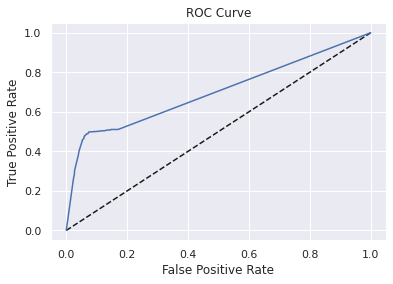

AUC: 0.6994193153153153
LogisticReg_3


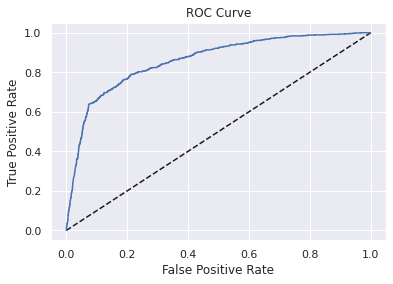

AUC: 0.8588005765765766
KNeighborsCl_3


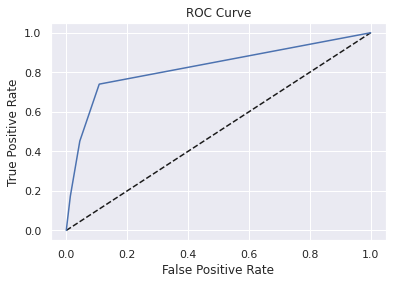

AUC: 0.824761009009009
RandomForestCl_3


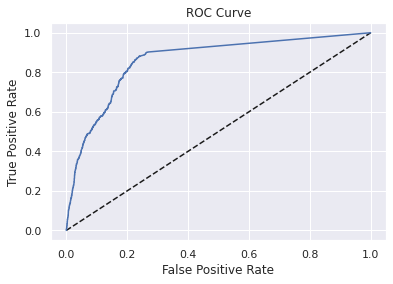

AUC: 0.8591036396396396
GradientBoostingCl_3


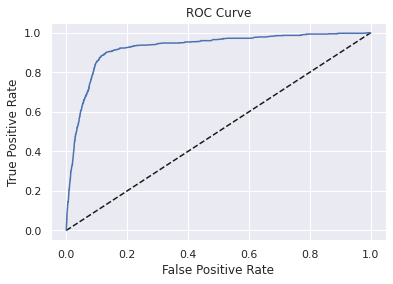

AUC: 0.9235917837837837
XGBClassifier_3


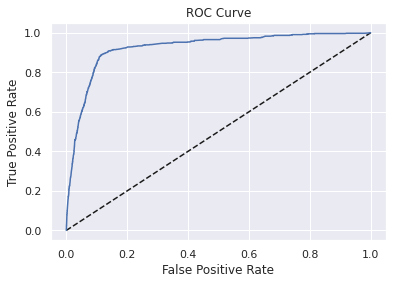

AUC: 0.9236927567567568


In [ ]:
for model, name in model_dic3.items():
  print(name)
  plot_roc_curve(model)

In [ ]:
Accuracy = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
Accuracy.sort_values(by= 'Accuracy', inplace=True)
#Accuracy

,Model,Accuracy
7,LogisticReg_smot,0.83
1,LogisticReg_0,0.84
13,LogisticReg_3,0.88
12,DecisionTree_3,0.88
8,KNeighborsCl_smot,0.89
15,RandomForestCl_3,0.90
11,XGBClassifier_smot,0.91
10,GradientBoostingCl_smot,0.91
0,DecisionTree_0,0.92
6,DecisionTree_smot,0.92


In [ ]:
Accuracy_cv = pd.DataFrame(list(cv_Accuracy.items()), columns=['Model', 'Accuracy'])
Accuracy_cv.sort_values(by= 'Accuracy', inplace=True)
#Accuracy_cv

,Model,Accuracy
1,LogisticReg_0,0.831267
7,LogisticReg_smot,0.836280
13,LogisticReg_3,0.873033
12,DecisionTree_3,0.877533
8,KNeighborsCl_smot,0.883625
15,RandomForestCl_3,0.901100
11,XGBClassifier_smot,0.913738
10,GradientBoostingCl_smot,0.914672
0,DecisionTree_0,0.915933
6,DecisionTree_smot,0.919577


### Apply Smote with column drop smote 2

In [ ]:
# Oversample
sm = SMOTE(random_state=47)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

In [ ]:
dt4 = DecisionTreeClassifier()
lr4 = LogisticRegression()
KNN4 = KNeighborsClassifier()
rf4= RandomForestClassifier()
GBC4 = GradientBoostingClassifier()
XGB4 = XGBClassifier()
models4 = [dt4, lr4, KNN4, rf4 , GBC4, XGB4]
models4

[DecisionTreeClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier()]

In [ ]:
model_names4 = ['DecisionTree_smot2', 'LogisticReg_smot2','KNeighborsCl_smot2','RandomForestCl_smot2',
               'GradientBoostingCl_smot2', 'XGBClassifier_smot2']

model_dic4 = dict(zip(models4, model_names4))
model_dic4

{DecisionTreeClassifier(): 'DecisionTree_smot2',
 LogisticRegression(): 'LogisticReg_smot2',
 KNeighborsClassifier(): 'KNeighborsCl_smot2',
 RandomForestClassifier(): 'RandomForestCl_smot2',
 GradientBoostingClassifier(): 'GradientBoostingCl_smot2',
 XGBClassifier(): 'XGBClassifier_smot2'}

In [ ]:
for model, name in model_dic4.items():
  print(name)
  modeling(model, name)

DecisionTree_smot2
              precision    recall  f1-score   support

          no       0.93      0.89      0.91      9296
         yes       0.90      0.93      0.91      9256

    accuracy                           0.91     18552
   macro avg       0.91      0.91      0.91     18552
weighted avg       0.91      0.91      0.91     18552

LogisticReg_smot2
              precision    recall  f1-score   support

          no       0.77      0.83      0.80      9296
         yes       0.82      0.76      0.79      9256

    accuracy                           0.79     18552
   macro avg       0.80      0.79      0.79     18552
weighted avg       0.80      0.79      0.79     18552

KNeighborsCl_smot2
              precision    recall  f1-score   support

          no       0.92      0.87      0.90      9296
         yes       0.88      0.93      0.90      9256

    accuracy                           0.90     18552
   macro avg       0.90      0.90      0.90     18552
weighted avg      

DecisionTree_smot2


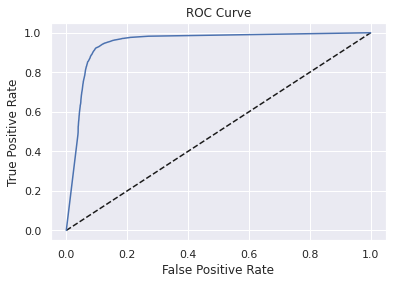

AUC: 0.9463505936791989
LogisticReg_smot2


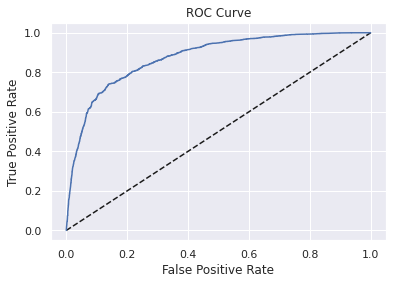

AUC: 0.8761111785703128
KNeighborsCl_smot2


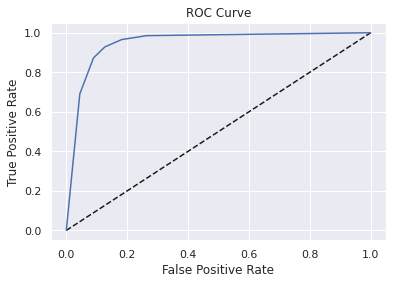

AUC: 0.9470197879274849
RandomForestCl_smot2


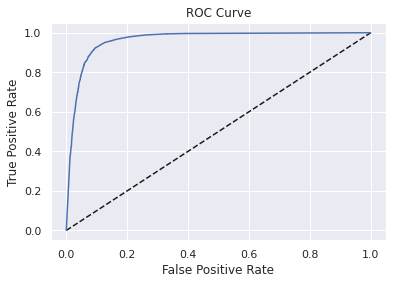

AUC: 0.9623836824641449
GradientBoostingCl_smot2


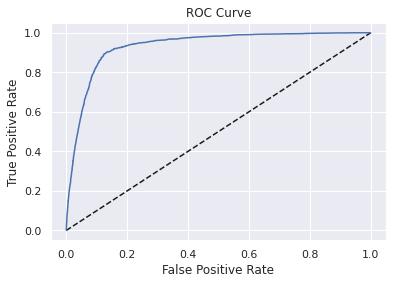

AUC: 0.9316578284523451
XGBClassifier_smot2


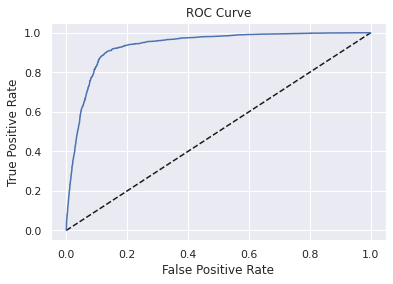

AUC: 0.93238272109304


In [ ]:
for model, name in model_dic4.items():
  print(name)
  plot_roc_curve(model)

In [ ]:
Accuracy = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
Accuracy.sort_values(by= 'Accuracy', inplace=True)
#Accuracy

In [ ]:
Accuracy_cv = pd.DataFrame(list(cv_Accuracy.items()), columns=['Model', 'Accuracy'])
Accuracy_cv.sort_values(by= 'Accuracy', inplace=True)
#Accuracy_cv

### PCA in pipeline for random forest


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [ ]:
df3.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,duration_cut,campaign_cut,balance_cut,age_cut
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,8,1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,8,1,0,2
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,8,1,0,1


In [ ]:
# get target and features
y = df3['y']
X = df3.drop(columns = ['y'])
# Oversample
sm = SMOTE(random_state=47)
X_res, y_res = sm.fit_resample(X, y)
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

In [ ]:
X_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,duration_cut,campaign_cut,balance_cut,age_cut
19204,50,9,2,1,0,330,0,0,0,6,1,376,3,8,1,0,2
58173,34,2,1,1,0,4549,1,0,0,19,6,948,1,0,1,0,1


In [ ]:
len(X_train.columns)

17

In [ ]:
# Scaling the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

x_test_sc = sc.transform(X_test)

PCA — how to choose the number of components?

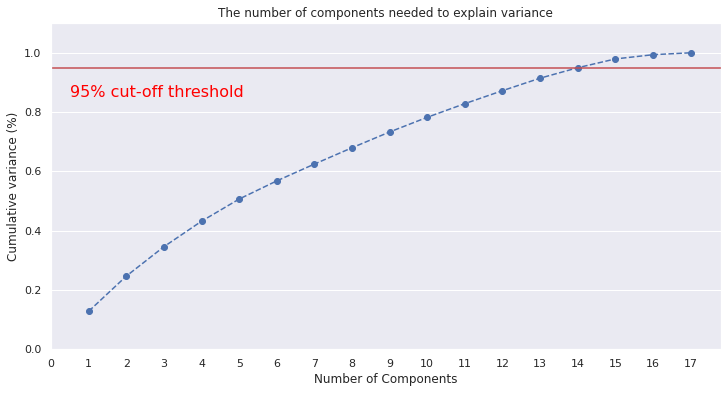

In [ ]:
#principal components explain a part of the variance. From the Scikit-learn implementation, 
#we can get the information about the explained variance and plot the cumulative variance.

pca = PCA().fit(X_train_sc)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots() 
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pipe_rf = make_pipeline(
    PCA(n_components=14),
     RandomForestClassifier())

In [ ]:
# X_train is a balance dataset and new feature 
modeling(pipe_rf, 'Pipe_pca_Smot_rf')

              precision    recall  f1-score   support

          no       0.95      0.92      0.94      9296
         yes       0.92      0.95      0.94      9256

    accuracy                           0.94     18552
   macro avg       0.94      0.94      0.94     18552
weighted avg       0.94      0.94      0.94     18552



In [ ]:
pipe_rf2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=14),
    RandomForestClassifier())

In [ ]:
# X_train is a balance dataset and new feature 
modeling(pipe_rf2, 'Pipe_pca_Smot_scale_rf')

              precision    recall  f1-score   support

          no       0.94      0.91      0.92      9296
         yes       0.91      0.94      0.93      9256

    accuracy                           0.93     18552
   macro avg       0.93      0.93      0.93     18552
weighted avg       0.93      0.93      0.93     18552



### NO Columns Drop models 4 (unbalance dataset)

In [ ]:
# get target and features
y = df3['y']
X = df3.drop(columns = ['y'])

In [ ]:
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [ ]:
from sklearn.utils import class_weight
# intialize all base line model
dt5 = DecisionTreeClassifier(class_weight=weight)
lr5 = LogisticRegression(class_weight=weight)
KNN5 = KNeighborsClassifier(n_neighbors= 4)
rf5= RandomForestClassifier(class_weight=weight)
GBC5 = GradientBoostingClassifier()
XGB5 = XGBClassifier(class_weight=weight)
models5 = [dt5, lr5, KNN5, rf5, GBC5, XGB5]
models5

[DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}),
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}),
 KNeighborsClassifier(n_neighbors=4),
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}),
 GradientBoostingClassifier(),
 XGBClassifier(class_weight={0: 0.07, 1: 0.93})]

In [ ]:
model_names5 = ['DecisionTree_4', 'LogisticReg_4','KNeighborsCl_4','RandomForestCl_4',
               'GradientBoostingCl_4', 'XGBClassifier_4']

model_dic5 = dict(zip(models5, model_names5))
model_dic5

{DecisionTreeClassifier(class_weight={0: 0.07, 1: 0.93}): 'DecisionTree_4',
 LogisticRegression(class_weight={0: 0.07, 1: 0.93}): 'LogisticReg_4',
 KNeighborsClassifier(n_neighbors=4): 'KNeighborsCl_4',
 RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}): 'RandomForestCl_4',
 GradientBoostingClassifier(): 'GradientBoostingCl_4',
 XGBClassifier(class_weight={0: 0.07, 1: 0.93}): 'XGBClassifier_4'}

In [ ]:
for model, name in model_dic5.items():
  print(name)
  modeling(model, name)

DecisionTree_4
              precision    recall  f1-score   support

          no       0.95      0.96      0.96      9250
         yes       0.45      0.40      0.42       750

    accuracy                           0.92     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.91      0.92      0.92     10000

LogisticReg_4
              precision    recall  f1-score   support

          no       0.98      0.88      0.93      9250
         yes       0.33      0.74      0.46       750

    accuracy                           0.87     10000
   macro avg       0.65      0.81      0.69     10000
weighted avg       0.93      0.87      0.89     10000

KNeighborsCl_4
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      9250
         yes       0.52      0.16      0.24       750

    accuracy                           0.93     10000
   macro avg       0.73      0.57      0.60     10000
weighted avg       0.90      0

### Smote and no columns drop  - smot 3





In [ ]:
# get target and features
y = df3['y']
X = df3.drop(columns = ['y'])
# Oversample
sm = SMOTE(random_state=47)
X_res, y_res = sm.fit_resample(X, y)
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

dt6 = DecisionTreeClassifier()
lr6 = LogisticRegression()
KNN6 = KNeighborsClassifier()
rf6= RandomForestClassifier()
GBC6 = GradientBoostingClassifier()
XGB6 = XGBClassifier()
models6 = [dt6, lr6, KNN6, rf6 , GBC6, XGB6]
models6

[DecisionTreeClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier()]

In [ ]:
model_names6 = ['DecisionTree_smot3', 'LogisticReg_smot3','KNeighborsCl_smot3','RandomForestCl_smot3',
               'GradientBoostingCl_smot3', 'XGBClassifier_smot3']

model_dic6 = dict(zip(models6, model_names6))
model_dic6

{DecisionTreeClassifier(): 'DecisionTree_smot3',
 LogisticRegression(): 'LogisticReg_smot3',
 KNeighborsClassifier(): 'KNeighborsCl_smot3',
 RandomForestClassifier(): 'RandomForestCl_smot3',
 GradientBoostingClassifier(): 'GradientBoostingCl_smot3',
 XGBClassifier(): 'XGBClassifier_smot3'}

In [ ]:
for model, name in model_dic6.items():
  print(name)
  modeling(model, name)

DecisionTree_smot3
              precision    recall  f1-score   support

          no       0.94      0.91      0.92      9296
         yes       0.92      0.94      0.93      9256

    accuracy                           0.93     18552
   macro avg       0.93      0.93      0.93     18552
weighted avg       0.93      0.93      0.93     18552

LogisticReg_smot3
              precision    recall  f1-score   support

          no       0.81      0.87      0.84      9296
         yes       0.85      0.80      0.82      9256

    accuracy                           0.83     18552
   macro avg       0.83      0.83      0.83     18552
weighted avg       0.83      0.83      0.83     18552

KNeighborsCl_smot3
              precision    recall  f1-score   support

          no       0.96      0.81      0.88      9296
         yes       0.84      0.97      0.90      9256

    accuracy                           0.89     18552
   macro avg       0.90      0.89      0.89     18552
weighted avg      

# LazyClassifier

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

In [ ]:
#lzy_clf  = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=47)
#lzy_models,predictions = lzy_clf.fit(X_train, X_test, y_train, y_test)

#print(lzy_models)
#print(type(lzy_models))

# Modeling Part III (Model Tuning)

### Random forest Model Tuning

In [227]:
# get target and features
y = df3['y']
X = df3.drop(columns = ['y'])
# Oversample
sm = SMOTE(random_state=47)
X_res, y_res = sm.fit_resample(X, y)
# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=47)

In [228]:
# define a function to perform the hyperparameters tuning of the random forest model 
def model_tune(model, param_grid, model_name):
    RandomGrid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1, random_state=47)
    RandomGrid_search.fit(X_train, y_train)
    model_tune = RandomGrid_search.best_estimator_
    y_pred = model_tune.predict(X_test) 
    report = classification_report(y_test, y_pred) 
    #target_names = ['satisfied', 'neutral or dissatisfied']
    #report = classification_report(y_test, y_pred, target_names=target_names)
    y_pred_prob = model_tune.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test,y_pred) #predictions
    accuracy_dic[model_name] = float(round(accuracy, 2))
    cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
    F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
    Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
    Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
    AUC[model_name] = roc_auc_score(y_test, y_pred_prob)
    best_params = RandomGrid_search.best_params_
    return best_params, print(report)

In [ ]:
#tune model one
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8, 10]
min_samples_split = [2,3, 4, 5]
min_samples_leaf = [1,2, 3]
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_tune =  RandomForestClassifier(random_state= 47)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [ ]:
model_tune(rf_tune, param_grid, 'RandomForestCl_smot_tune')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9296
           1       0.90      0.94      0.92      9256

    accuracy                           0.92     18552
   macro avg       0.92      0.92      0.92     18552
weighted avg       0.92      0.92      0.92     18552



({'n_estimators': 100,
  'min_samples_split': 3,
  'min_samples_leaf': 3,
  'max_features': 'auto',
  'max_depth': 10,
  'bootstrap': True},
 None)

In [229]:
#tune model two
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 200, num = 30)]
max_features = ['auto', 'sqrt']
max_depth = [8, 10, 12, 14]
min_samples_split = [3, 4, 5]
min_samples_leaf = [3,4, 5]
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_tune2 =  RandomForestClassifier(random_state= 47)

{'n_estimators': [90, 93, 97, 101, 105, 108, 112, 116, 120, 124, 127, 131, 135, 139, 143, 146, 150, 154, 158, 162, 165, 169, 173, 177, 181, 184, 188, 192, 196, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [8, 10, 12, 14], 'min_samples_split': [3, 4, 5], 'min_samples_leaf': [3, 4, 5], 'bootstrap': [True, False]}


In [230]:
model_tune(rf_tune2, param_grid, 'RandomForestCl_smot_tune2')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9296
           1       0.92      0.96      0.94      9256

    accuracy                           0.94     18552
   macro avg       0.94      0.94      0.94     18552
weighted avg       0.94      0.94      0.94     18552



({'n_estimators': 112,
  'min_samples_split': 4,
  'min_samples_leaf': 3,
  'max_features': 'sqrt',
  'max_depth': 14,
  'bootstrap': True},
 None)

In [233]:
#tune model three
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 150, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [14, 16, 18]
min_samples_split = [4, 5, 6]
min_samples_leaf = [3, 4]
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_tune3 =  RandomForestClassifier(random_state= 47)

{'n_estimators': [100, 105, 111, 116, 122, 127, 133, 138, 144, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [14, 16, 18], 'min_samples_split': [4, 5, 6], 'min_samples_leaf': [3, 4], 'bootstrap': [True, False]}


In [234]:
model_tune(rf_tune2, param_grid, 'RandomForestCl_smot_tune3')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9296
           1       0.93      0.97      0.95      9256

    accuracy                           0.95     18552
   macro avg       0.95      0.95      0.95     18552
weighted avg       0.95      0.95      0.95     18552



({'n_estimators': 116,
  'min_samples_split': 6,
  'min_samples_leaf': 3,
  'max_features': 'sqrt',
  'max_depth': 18,
  'bootstrap': False},
 None)

In [238]:
#!pip install hyperopt

In [239]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

In [258]:
#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [ ]:
# define objective function
#cross-validation to avoid overfitting and then the function will return a loss values and its status
#Remember that hyperopic minimizes the function, that why I add a negative sign in the acc 
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params, n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [ ]:
#Fine Tune the Mode
# Initialize trials object
trials = Trials()

best = fmin(fn =hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials)

print("Best: {}".format(best))

In [ ]:
print(best)# best_params

In [255]:
  # new search space
search_space={'n_estimators':hp.randint('n_estimators',110,120,2),
              'max_depth': hp.quniform('max_depth',16,22,2),           
              'min_samples_split':hp.quniform('min_samples_split',6,10,1),   
              'min_samples_leaf':hp.quniform('min_samples_leaf',3,6,1),
              'criterion':hp.choice('criterion', ['gini','entropy']),
              'max_features':hp.choice('max_features',['sqrt', 'log2', 'auto']) }

In [256]:
# redefine the function usng a wider range of hyperparameters
def hyperparameter_tuning2(search_space):
    model_name ='RandomForestCl_smot_tune4_HyperOpt'
    model = RandomForestClassifier(search_space, random_state=47)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_prob = model_tune.predict_proba(X_test)[:,1]
    accuracy_dic[model_name] = float(round(accuracy, 2))
    cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
    F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
    Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
    Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
    AUC[model_name] = roc_auc_score(y_test, y_pred_prob)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [252]:
## set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
trials2 = Trials()
#best_params = fmin(fn=hyperparameter_tuning2, space=search_space, algo=algorithm, max_evals=100, trials=trials2)

In [257]:
best_params = fmin(fn=hyperparameter_tuning2, space=search_space, algo=algorithm, max_evals=100, trials=trials2)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]


TypeError: ignored

In [ ]:
y_pred_prob = model_tune.predict_proba(X_test)[:,1]
accuracy_dic[model_name] = float(round(accuracy, 2))
cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
AUC[model_name] = roc_auc_score(y_test, y_pred_prob)
best_params = RandomGrid_search.best_params_

In [ ]:
#tune model four
# define hyperparams
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 130, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [18, 20, 22]
min_samples_split = [5, 6, 7, 8]
min_samples_leaf = [3, 4]
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_tune3 =  RandomForestClassifier(random_state= 47)

### XGBoost Model Tuning (bayesian optimization) HyperOpt

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

In [ ]:
space={'max_depth': hp.quniform("max_depth", 1, 18, 1),
       'learning_rate':hp.uniform('learning_rate', 0, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,100,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.2,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'], learning_rate = int(space['learning_rate']),
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    #print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:
params = { 'max_depth': [3,6,8,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(random_state= 47)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)

### Experiment Losgistic regression model tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()
pca = PCA()
logistic_Reg = LogisticRegression()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])
pipe

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA()),
                ('logistic_Reg', LogisticRegression())])

In [ ]:
#Principal Component Analysis requires a parameter 'n_components' to be optimised. 'n_components' 
#signifies the number of components to keep after reducing the dimension.
n_components = list(range(1,X.shape[1]+1,1))
n_components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [ ]:
#reating a dictionary to set all the parameters options for different modules.
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
#parameters

In [ ]:
Log_reg_GS = GridSearchCV(pipe, parameters)

In [ ]:
Log_reg_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [ ]:
print('Best Penalty:', Log_reg_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', Log_reg_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', Log_reg_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(Log_reg_GS.best_estimator_.get_params()['logistic_Reg'])

In [205]:
Log_reg_Tune = Log_reg_GS.best_params_
Log_reg_Tune

{'logistic_Reg__C': 2.559547922699533,
 'logistic_Reg__penalty': 'l2',
 'pca__n_components': 17}

In [ ]:
Log_reg_Tune = {'logistic_Reg__C': 2.559547922699533,
 'logistic_Reg__penalty': 'l2',
 'pca__n_components': 17}

In [212]:
Log_reg_GS.best_estimator_  

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=17)),
                ('logistic_Reg', LogisticRegression(C=2.559547922699533))])

In [ ]:
#Log_reg_GS.best_estimator_
Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=17)),
                ('logistic_Reg', LogisticRegression(C=2.559547922699533))])

In [208]:
def model_tune_log(model, model_name):
    model_tune = model.best_estimator_
    y_pred = model_tune.predict(X_test) 
    report = classification_report(y_test, y_pred) 
    #target_names = ['satisfied', 'neutral or dissatisfied']
    #report = classification_report(y_test, y_pred, target_names=target_names)
    y_pred_prob = model_tune.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test,y_pred) #predictions
    accuracy_dic[model_name] = float(round(accuracy, 2))
    cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
    F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
    Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
    Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
    AUC[model_name] = roc_auc_score(y_test, y_pred_prob)
    best_params = model.best_params_
    return best_params, print(report)

In [210]:
#model_tune_log(Log_reg_GS, 'Log_reg_Tune')

In [215]:
model_tunee = Log_reg_GS.best_estimator_
y_pred = Log_reg_GS.predict(X_test)
report = classification_report(y_test, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9296
           1       0.87      0.87      0.87      9256

    accuracy                           0.87     18552
   macro avg       0.87      0.87      0.87     18552
weighted avg       0.87      0.87      0.87     18552



In [217]:
model_name = 'Log_reg_Tune'
y_pred_prob = model_tunee.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test,y_pred) #predictions
accuracy_dic[model_name] = float(round(accuracy, 2))
cv_Accuracy[model_name] = (cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')).mean()
F1_score[model_name]= f1_score(y_test, y_pred, average="weighted")
Precision_score[model_name]= precision_score(y_test, y_pred, average="weighted")
Recall_score[model_name] = recall_score(y_test, y_pred, average="weighted")
AUC[model_name] = roc_auc_score(y_test, y_pred_prob)

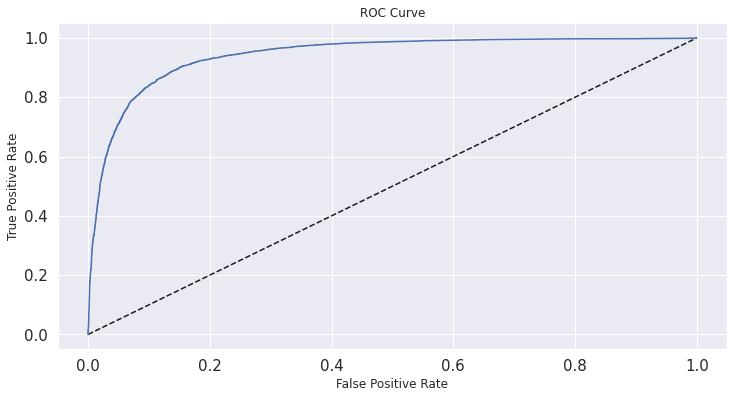

AUC: 0.9417793333477137


In [224]:
plot_roc_curve(model_tune)

XGBoost Model Tuning

# Models Compare

In [218]:
Accuracy_cv = pd.DataFrame(list(cv_Accuracy.items()), columns=['Model', 'Accuracy'])
Accuracy_cv.sort_values(by= 'Accuracy', inplace=True)
#Accuracy_cv

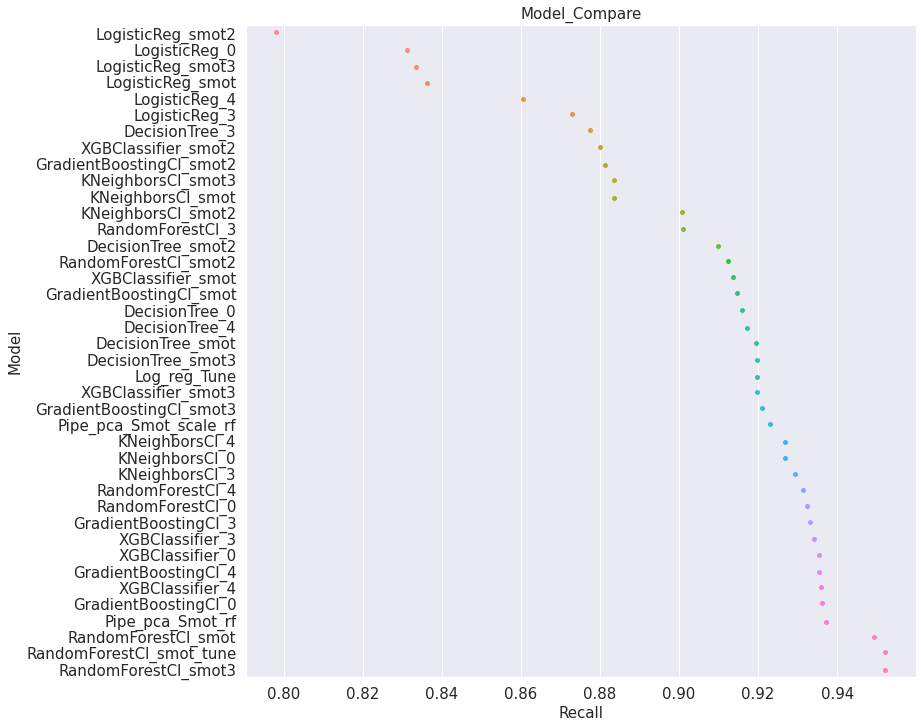

In [219]:
plt.figure(figsize=(12, 12))
sns.stripplot(Accuracy_cv.Accuracy, Accuracy_cv.Model);
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Model', fontsize=15)
plt.title('Model_Compare', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

In [235]:
Accuracy = pd.DataFrame(list(accuracy_dic.items()), columns=['Model', 'Accuracy'])
Accuracy.sort_values(by= 'Accuracy', inplace=True)
Accuracy

,Model,Accuracy
19,LogisticReg_smot2,0.79
7,LogisticReg_smot,0.83
33,LogisticReg_smot3,0.83
1,LogisticReg_0,0.84
39,Log_reg_Tune,0.87
27,LogisticReg_4,0.87
23,XGBClassifier_smot2,0.88
22,GradientBoostingCl_smot2,0.88
12,DecisionTree_3,0.88
13,LogisticReg_3,0.88


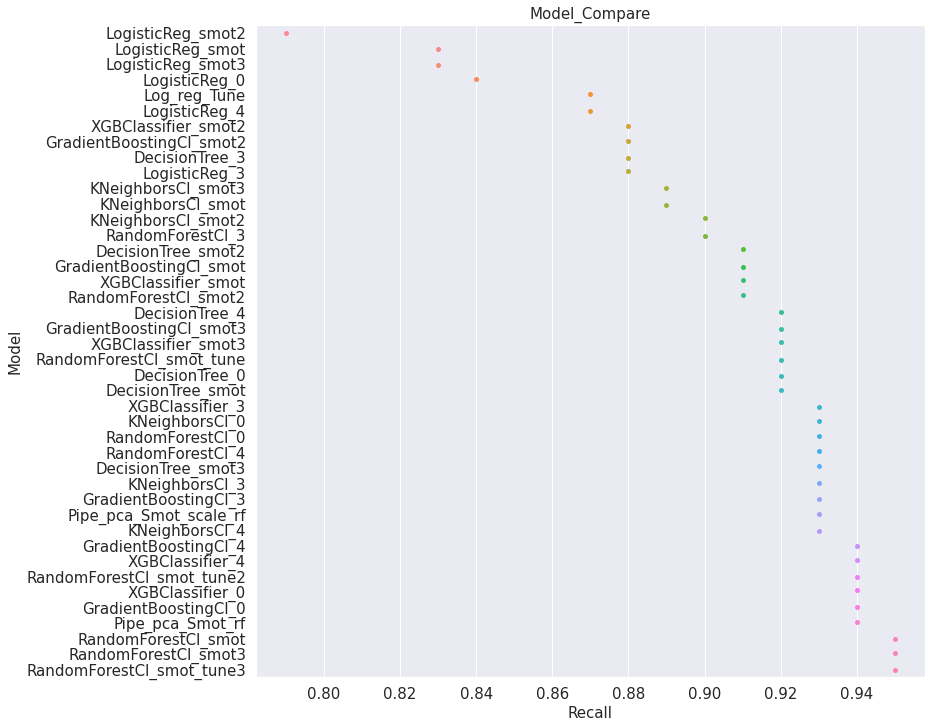

In [236]:
plt.figure(figsize=(12, 12))
sns.stripplot(Accuracy.Accuracy, Accuracy.Model);
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Model', fontsize=15)
plt.title('Model_Compare', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

In [222]:
F1 = pd.DataFrame(list(F1_score.items()), columns=['Model', 'F1_score'])
F1.sort_values(by= 'F1_score', inplace=True)
#F1

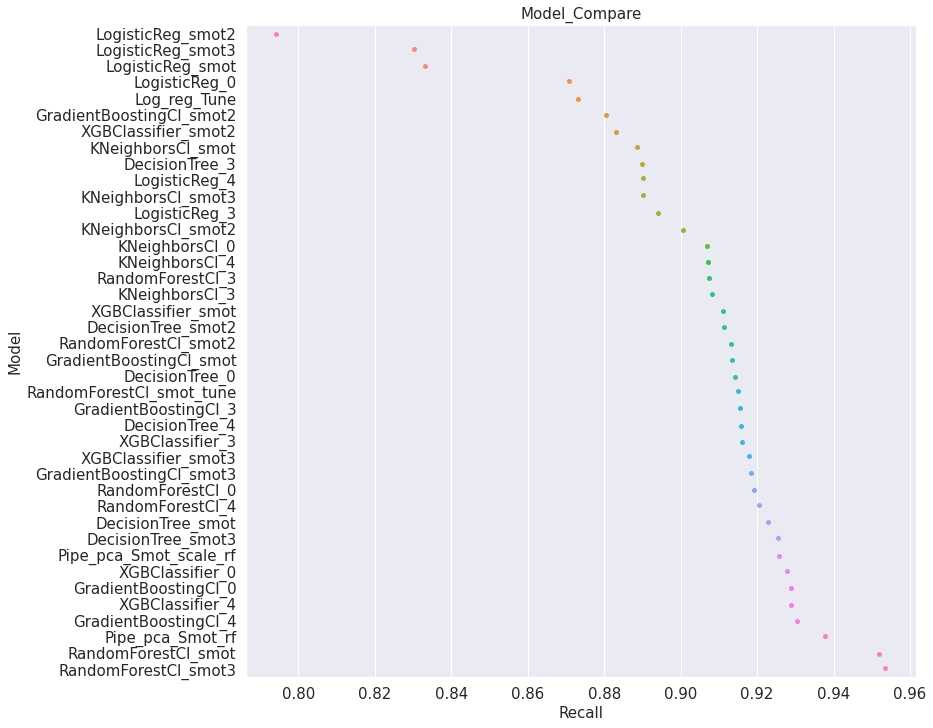

In [223]:
plt.figure(figsize=(12, 12))
sns.stripplot(F1.F1_score, F1.Model);
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Model', fontsize=15)
plt.title('Model_Compare', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()